In [380]:
import numpy as np
import pandas as pd

import os

from duncan_test import duncan_test

import ipywidgets as widgets

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

import matplotlib.gridspec as gridspec

In [381]:
def drop_zero_cols(df):
    df = df.dropna(axis=1, how='all') # Drop columns with all NaN values
    df.replace(" ", 0, inplace=True)
    df = df.loc[:, (df != 0).any(axis=0)] # Drop columns with all zero values
    return df

#function to compute richness of a community 
def richness(list):

    are_all_numbers = all(isinstance(x, (int, float)) for x in list)

    assert are_all_numbers, "All elements in the list must be numbers"

    return np.count_nonzero( list )

#function to compute Shannon's diversity index 
def shannon_idx(list):
    
    #assert 0 not in list, "All elements in the list must be non-zero!"
    idx = 0
    for l in list:
        if l != 0:
            idx += -l*np.log(l) 
    #assert sum(list) == 1, "Elements of the list must sum to 1!"
    return idx

In [382]:
#df = pd.read_excel("C:/Users/edoardo.marchi/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3) 
df = pd.read_excel("C:/Users/edo13/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3) 

In [383]:
# keeping only abiotic data

#df_ab = df[["TREAT", "Season", "S.M", "OM", "EC-(ds/m)", "pH", 'TN-(%)', 'OC-(%)', 'C:N']]

df_ab = df[["SITE", "TREAT", "Season", "S.M", "OM", "EC-(ds/m)", "pH", 'TN-(%)', 'OC-(%)', 'C:N',
 'Ascomycota', 
 'Basidiomycota',
 'Chytridiomycota',
 'Glomeromycota',
 'Mortierellomycota',
 'Mucoromycota',
 'Rozellomycota',
 'uni']]

# creating a list of phyla 
# discard Kickxellomycota since they're extremely rare 

phyla_list = [ 'Ascomycota', 
 'Mortierellomycota',
 'uni',
 'Basidiomycota',
 'Chytridiomycota',
 'Glomeromycota',
 'Mucoromycota',
 'Rozellomycota'
 ] 

#creating a list of abiotic

abiotic = ["S.M", "OM", "EC-(ds/m)", 'pH', 'TN-(%)', 'OC-(%)', 'C:N']

# standardize abiotics(subtract the average, divide by the std)
#for ab in abiotic:
#   df_ab[ab] = ( df_ab[ab]-df_ab[ab].mean() )/df_ab[ab].std()

In [384]:
# compute normalization
norm=df_ab[phyla_list].sum(axis=1, numeric_only=True)

In [385]:
# keep only non-zero rows
df_ab=df_ab.iloc[norm[norm.values>0.].index]
norm=norm[norm.values>0.]

#df_ab = df_ab.reset_index(drop=True)

# rescale phyla values to [0, 1]

for phyla in phyla_list:
    df_ab[phyla] = df_ab[phyla]/norm

In [386]:
# dataset where we replace nan with zeros. In some cases we need to use this. 

df_ab_mod = df_ab.fillna(0.)

df_ab_mod = df_ab_mod.replace(" ", 0)

# PHYLA ABUNDANCES STACKPLOT

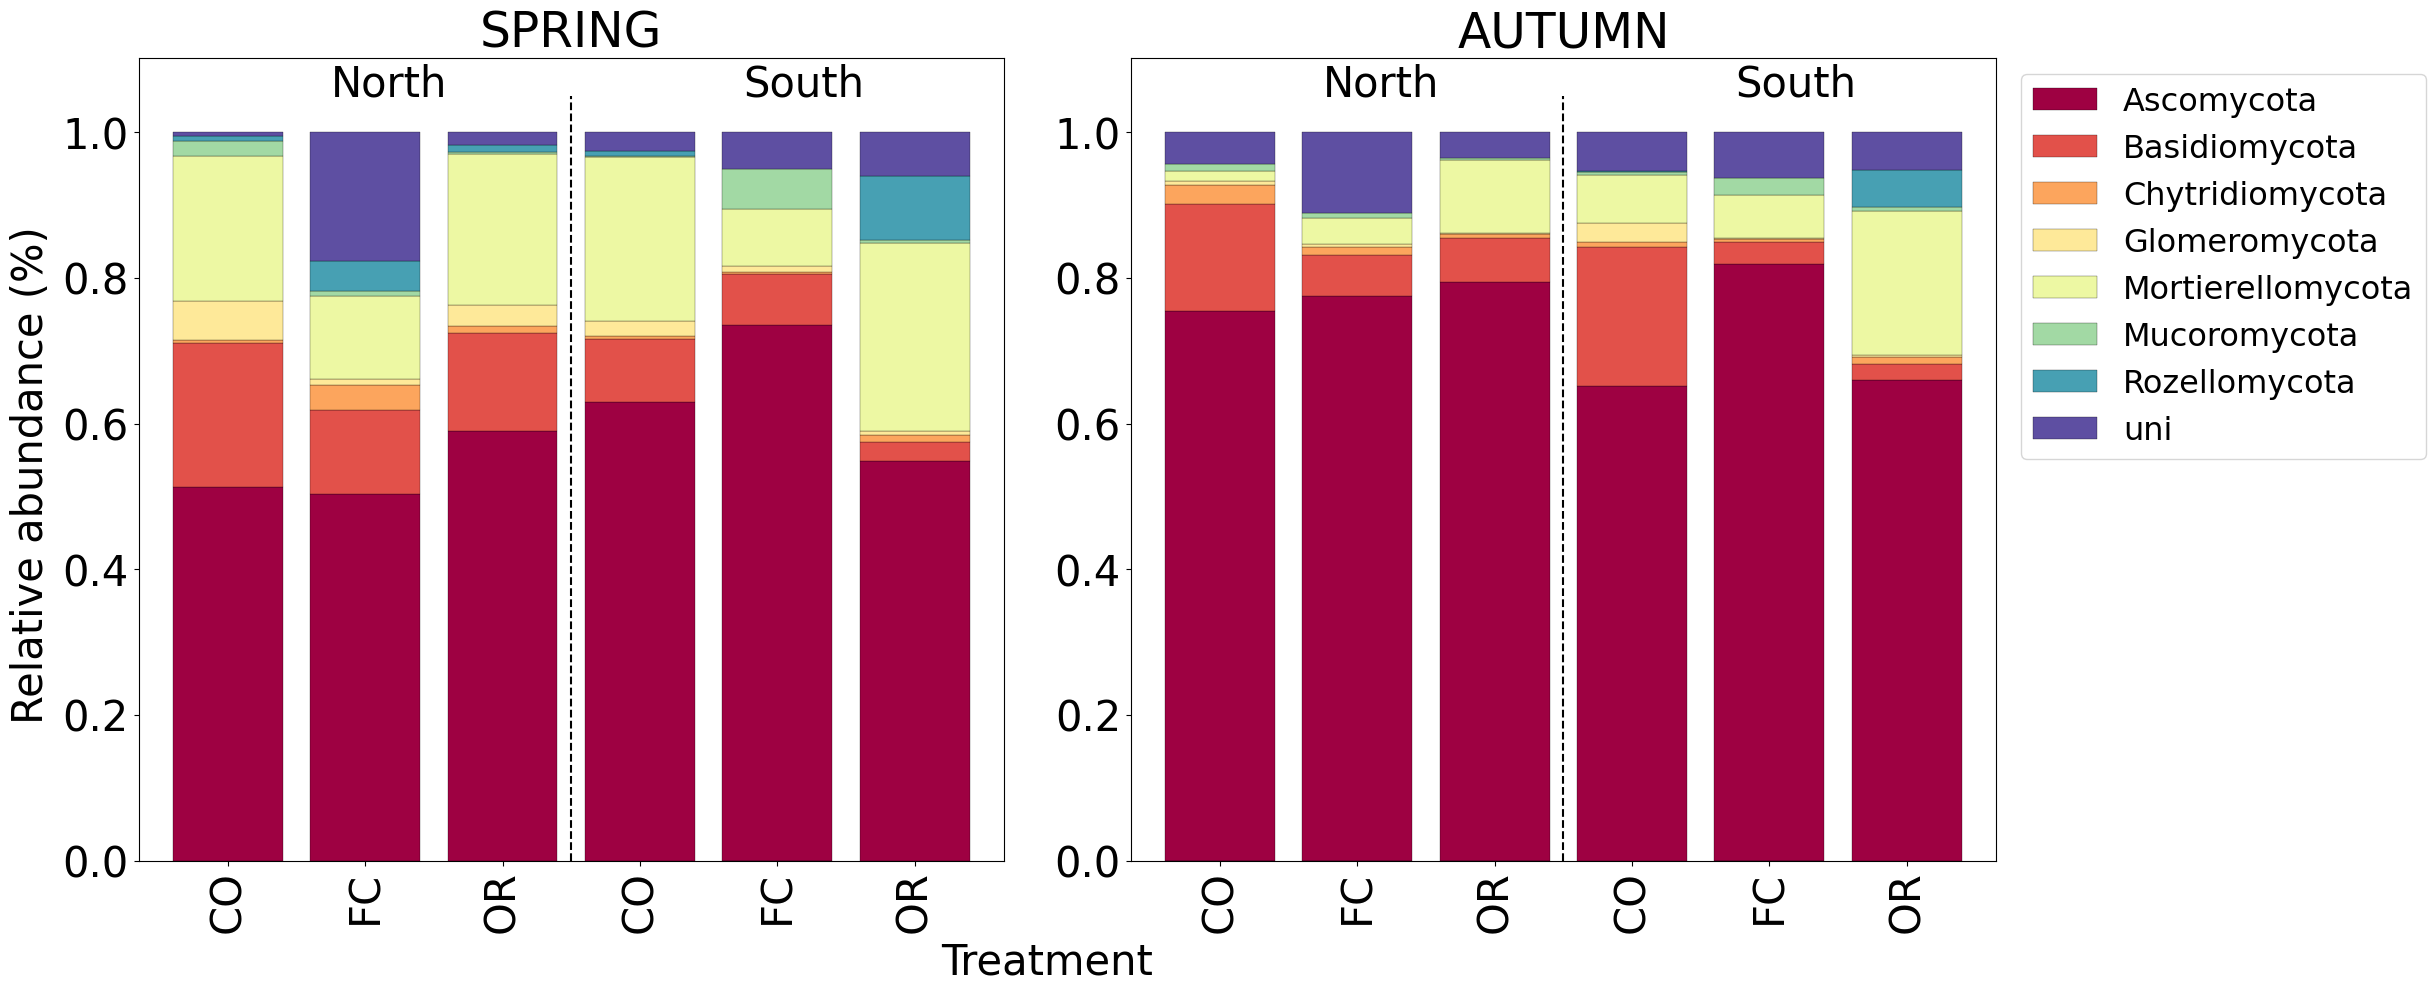

In [387]:
# AUT vs SPR, averaged over all the other factors

fig, ax = plt.subplots( 1, 2, figsize = ( 2*10, 10 ) )

# dropping also Olpidiomycota here, to few non-zero entries
df_group = df_ab[["SITE",
                  "TREAT", 
                  "Season",
                  'Ascomycota', 
                  'Basidiomycota',
                  'Chytridiomycota',
                  'Glomeromycota',
                  'Mortierellomycota',
                  'Mucoromycota',
                  'Rozellomycota',
                  'uni']]

df_group = df_group.groupby(["Season", "SITE", "TREAT"]).mean()

col = sns.color_palette("hls", 11)

df_group.loc["SPR"].plot(kind='bar', stacked=True,
                         ax = ax[0], width=0.8,
                         edgecolor="black", lw=0.2,
                         legend = False, colormap = 'Spectral')

ax[0].set_xlabel("Treatment", fontsize = 30)
ax[0].set_ylabel("Relative abundance (%)", fontsize = 30)
ax[0].plot([2.5,2.5], [0,1.05], 'k--')
ax[0].text(0.75, 1.05, "North", fontsize = 30)
ax[0].text(0.75+3, 1.05, "South", fontsize = 30)
ax[0].set_title("SPRING", fontsize = 35)
ax[0].set_xticklabels(2*["CO", "FC", "OR"])
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].xaxis.set_label_coords(1.05, -0.1)
ax[0].yaxis.set_label_coords(-0.1, 0.48)

df_group.loc["AUT"].plot(kind='bar', stacked=True,
                         ax = ax[1], width=0.8,
                         edgecolor="black", lw=0.2,
                         legend = True, colormap = 'Spectral')

ax[1].set_xlabel("", fontsize = 25)
#ax[1].set_ylabel("Relative abundance (%)", fontsize = 25)
ax[1].plot([2.5,2.5], [0,1.05], 'k--')
ax[1].text(0.75, 1.05, "North", fontsize = 30)
ax[1].text(0.75+3, 1.05, "South", fontsize = 30)
ax[1].set_title("AUTUMN", fontsize = 35)
ax[1].set_xticklabels(2*["CO", "FC", "OR"])
ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].xaxis.set_label_coords(0.5, -0.2)
ax[1].yaxis.set_label_coords(-0.1, 0.5)

fig.tight_layout()

ax[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize = 23)
#ax.set_ylim([0, 1])

#plt.savefig("stacked_plots/stacked_complete.pdf", bbox_inches = 'tight')

# ABIOTIC BOXPLOT

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:4.376e-05 t=4.294e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.113e-05 t=4.375e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.424e-03 t=3.285e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:4.216e-02 t=2.059e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:3.020e-08 t=-6.032e+00
p-value annotation legend:
      ns: 5.00e-02 < 

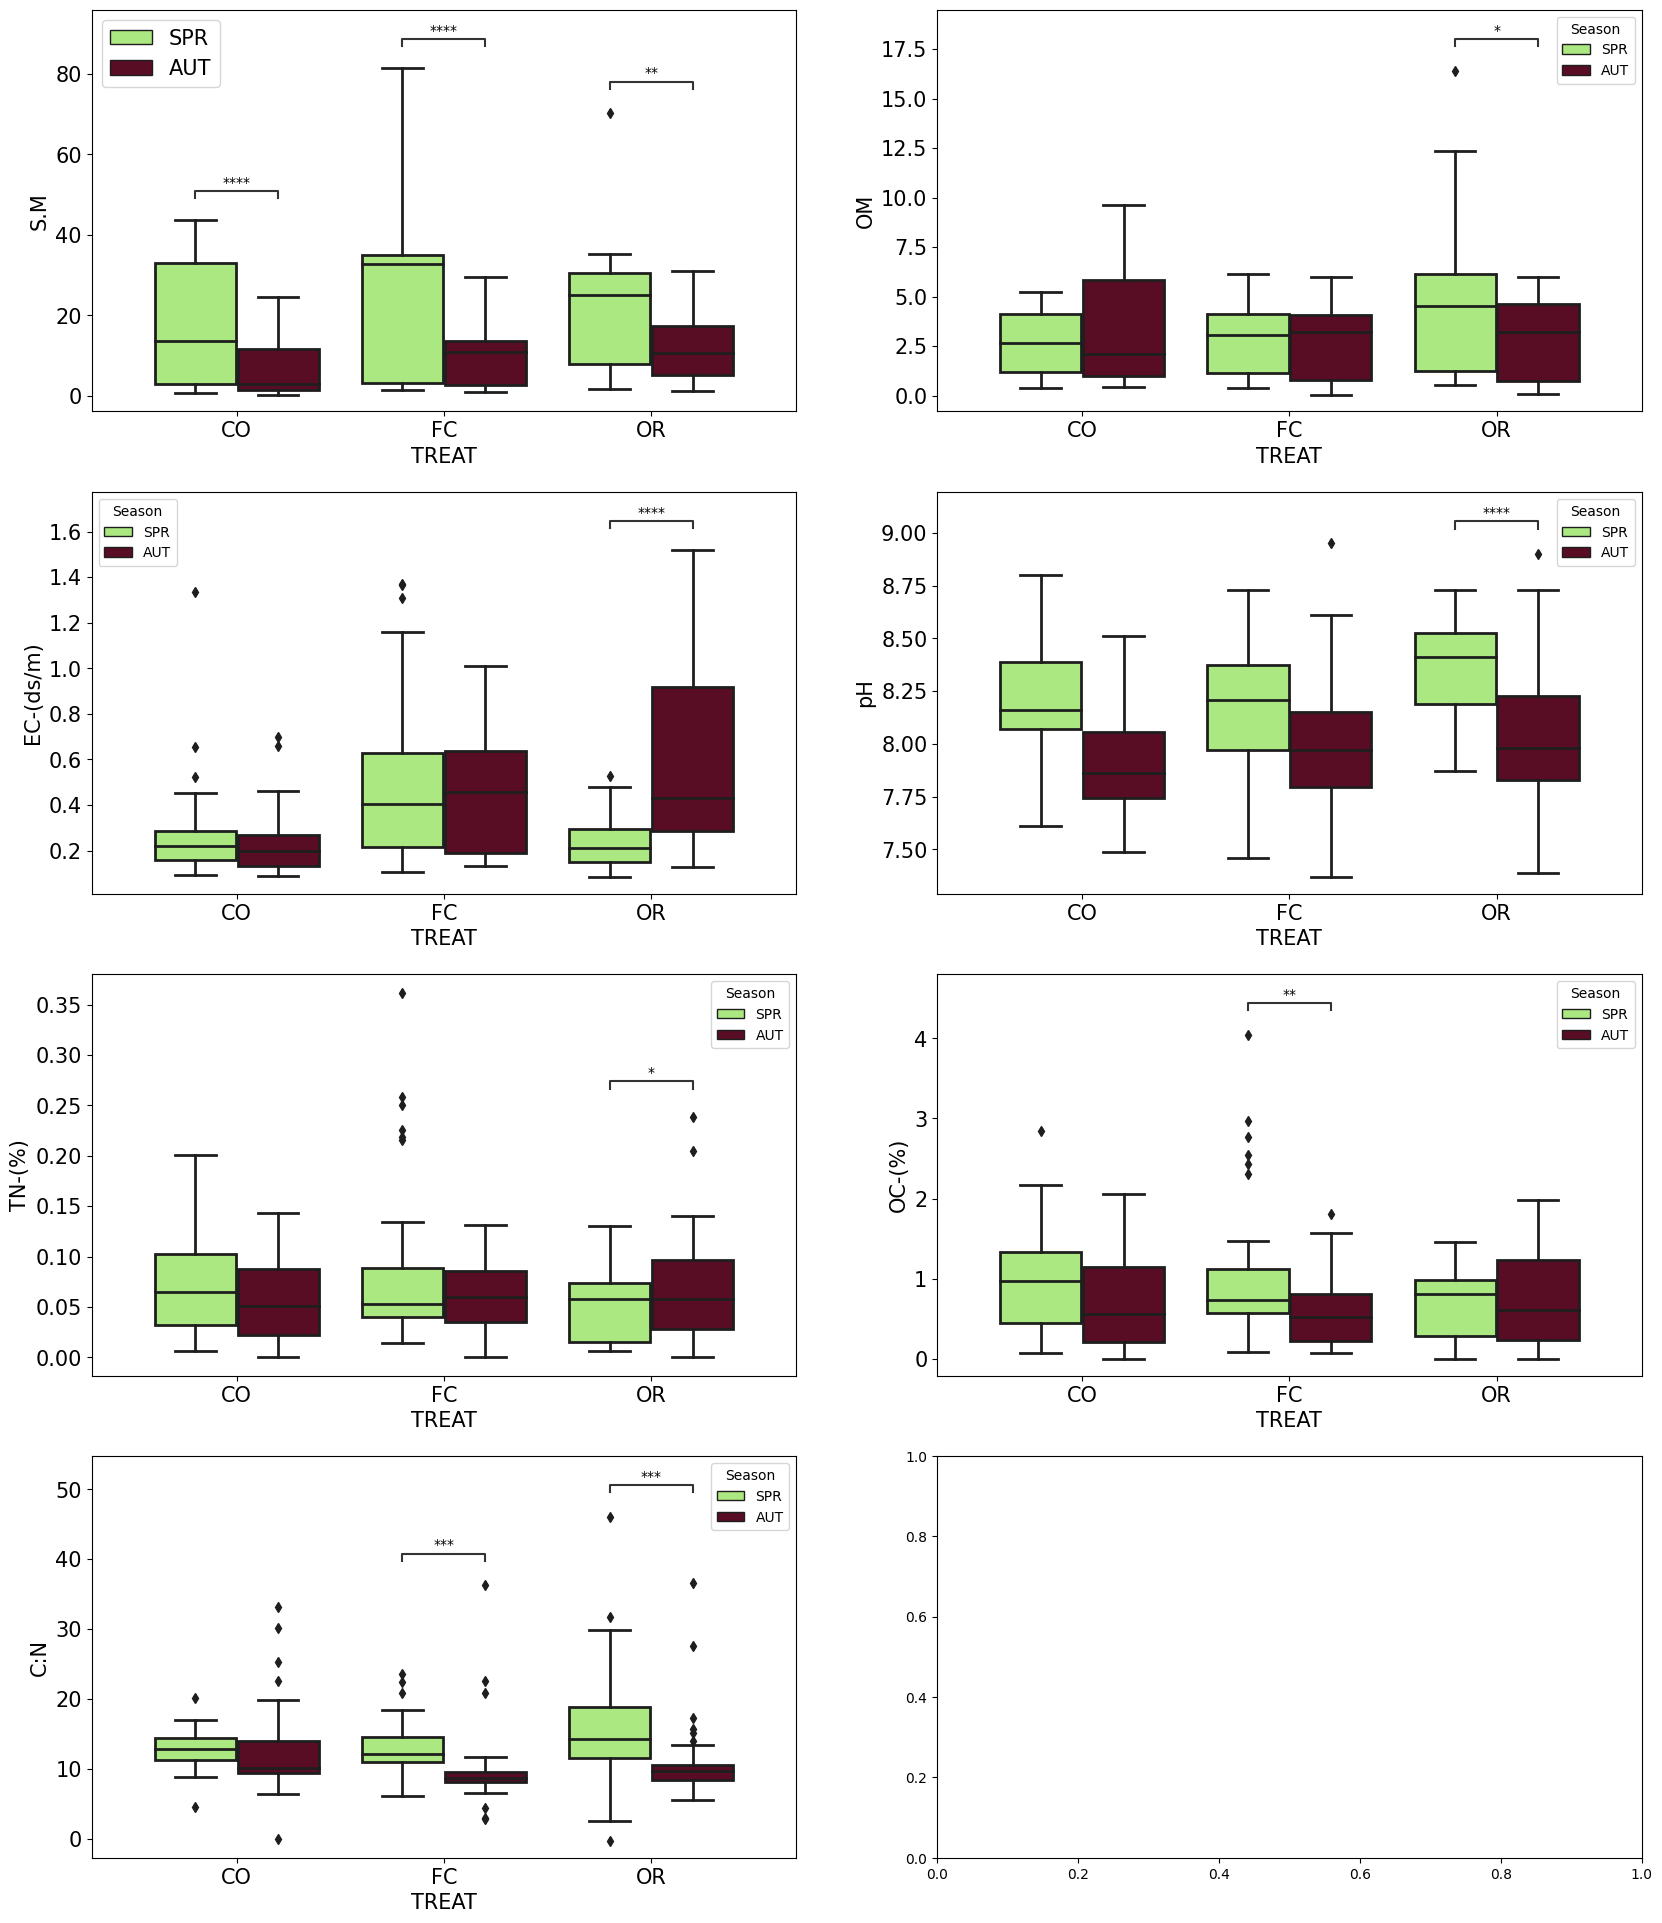

In [388]:
fig, ax = plt.subplots(4,2, figsize = (2*10, 4*6))
ax = ax.reshape(-1)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

df_ab = df_ab.rename(columns={"S.M": "SM", "EC-(ds/m)": "EC", "TN-(%)" : "TN", "OC-(%)" : "OC", "C:N" : "CN"})
df_ab_mod = df_ab_mod.rename(columns={"S.M": "SM", "EC-(ds/m)": "EC", "TN-(%)" : "TN", "OC-(%)" : "OC", "C:N" : "CN"})

abiotic_list = ["SM", "OM", "EC", "pH", 'TN', 'OC', 'CN']

for i, ab in enumerate( abiotic_list ):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    if i == 0:
        ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)
        ax[i].legend(fontsize = 15)
    else:   
        ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]
    
    plotting_parameters = {
        'data':    df_ab_mod,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }

    annotator = Annotator(ax[i], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i].tick_params(labelsize = 15)
    ax[i].set_ylabel(abiotic[i], fontsize = 15)
    ax[i].set_xlabel("TREAT", fontsize = 15)
    
#plt.savefig("abiotic_boxplot_less_Annot.pdf", bbox_inches = 'tight')    

# PHYLA BOXPLOT

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:1.331e-05 t=-4.606e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.811e-03 t=-2.966e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:2.455e-04 t=-3.810e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:1.796e-05 t=4.518e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.712e-04 t=-3.692e+00
p-value annotation legend:
      ns: 5.00e-02

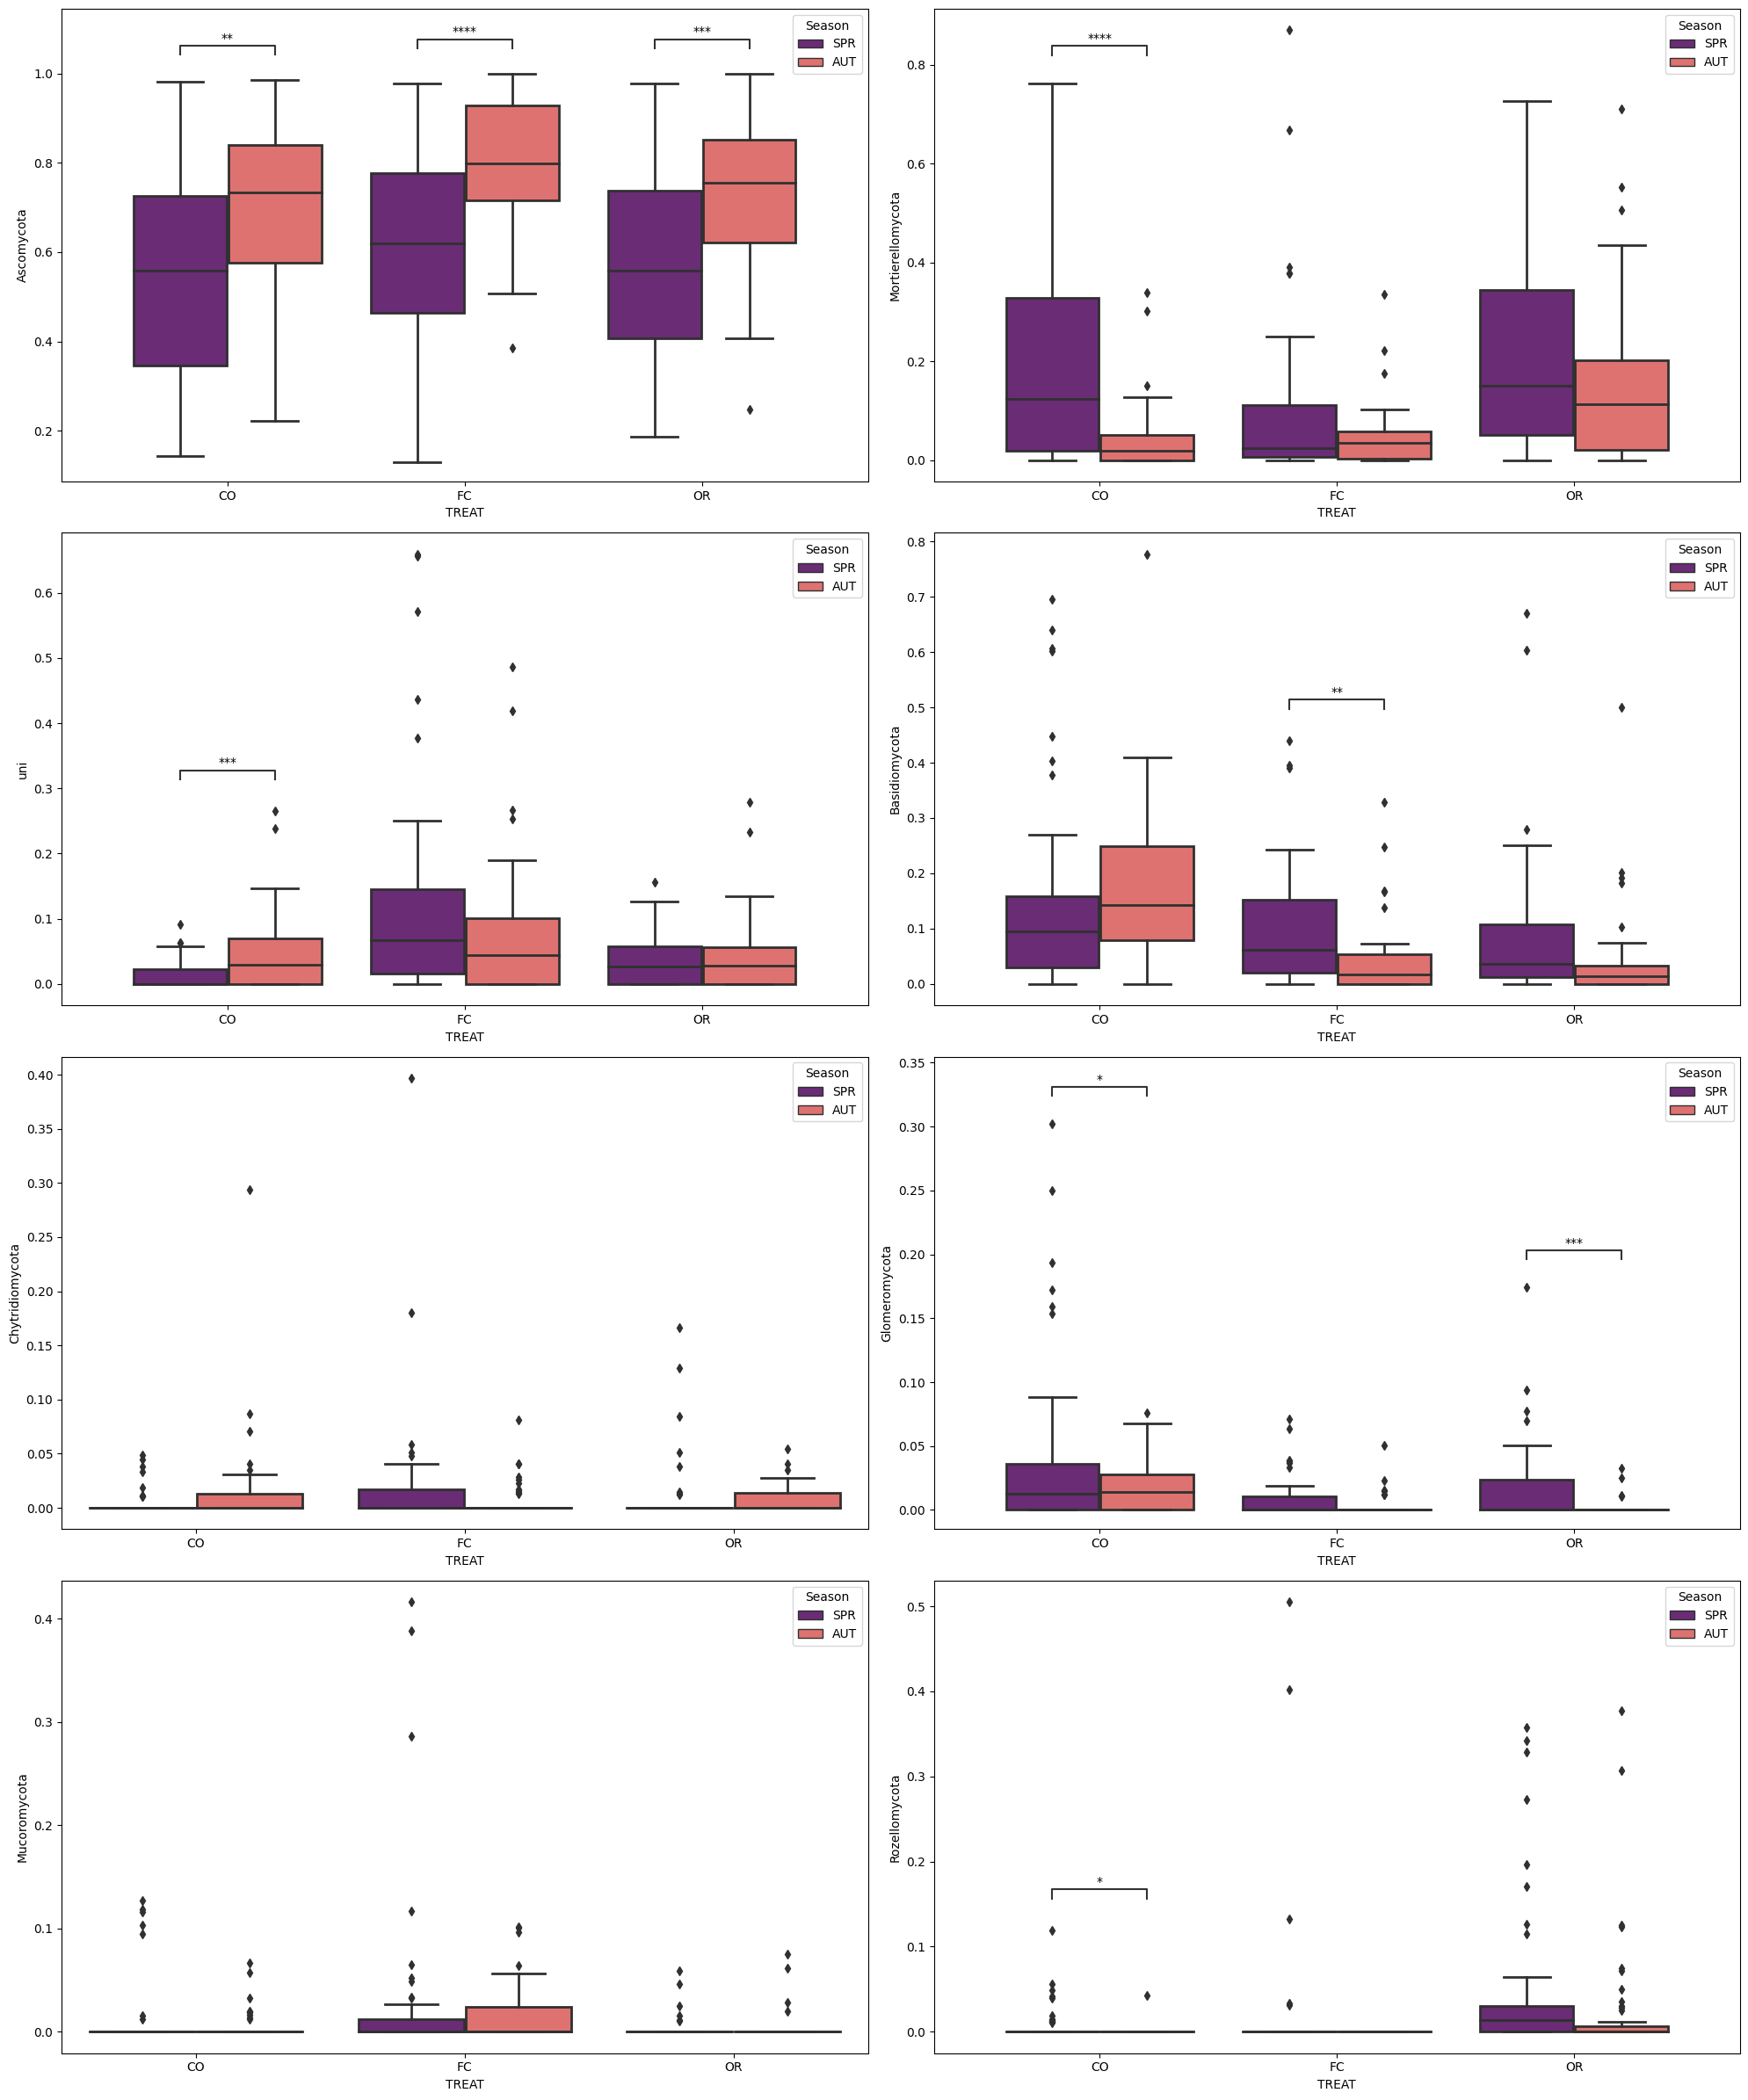

In [389]:
fig, axx = plt.subplots(4, 2, figsize=(2*10, 4*6), tight_layout=True)
axx = axx.reshape(-1)
colors = ['crimson', 'navy', 'orange']

pairs = [(("CO", "SPR"),("CO", "AUT")),
        (("FC", "SPR"),("FC", "AUT")),
        (("OR", "SPR"),("OR", "AUT"))]

p_values = np.zeros(3)

for ax, node in zip(axx, phyla_list):
    plotting_parameters = {
        'data':    df_ab,
        'x':       'TREAT',
        'y':       node,
        'hue':     'Season'
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    #plt.savefig("phyla_boxplot.pdf", bbox_inches = 'tight')

# RICHNESS/SHANNON INDEX BOXPLOT

In [390]:
# prepare dataframe with genera abundances

# drop last columns, then keep only first 4 columns and all the genera columns
df_genera = df.iloc[:, :-5]
df_genera_1 = df_genera[['SITE', 'Season','TREAT']]
df_genera_2 = df_genera.iloc[:, 25:]
df_genera = pd.concat( [df_genera_1, df_genera_2], axis=1 )

In [391]:
norm=df_genera.iloc[:, 3:].sum(axis=1, numeric_only=True)

# remove zero rows
df_genera=df_genera.iloc[norm[norm.values>0.].index]
df_genera = drop_zero_cols(df_genera)

norm=norm[norm.values>0.]

for col in df_genera.columns[3:]:
    df_genera[col]=df_genera[col]/norm  

# we replace nan with zeros

df_genera = df_genera.fillna(0.)

df_genera = df_genera.replace(" ", 0)    

In [392]:
df_genera.insert(3, "Shannon_Index_genera", np.zeros(len(df_genera)), True)
df_genera.insert(3, "Richness_genera", np.zeros(len(df_genera)), True)
df_genera = df_genera.reset_index(drop=True)

In [393]:
for i in range(len(df_genera)):
    df_genera.at[i, "Shannon_Index_genera"] = shannon_idx( df_genera.iloc[i, 3:]) 
    df_genera.at[i, "Richness_genera"] = richness( df_genera.iloc[i, 3:]) 

In [394]:
df_ab_mod.insert(3, "Shannon_Index", np.zeros(len(df_ab_mod)), True)
df_ab_mod.insert(3, "Richness", np.zeros(len(df_ab_mod)), True)

df_ab_mod = df_ab_mod.reset_index(drop=True)

In [395]:
for i in range(len(df_ab)):
    df_ab_mod.at[i, "Shannon_Index"] = shannon_idx( df_ab_mod.iloc[i, 12:]) 
    df_ab_mod.at[i, "Richness"] = richness( df_ab_mod.iloc[i, 12:]) 

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:6.855e-03 t=2.767e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.243e-02 t=2.548e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:2.363e-04 t=3.829e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:6.465e-04 t=3.527e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:1.173e-02 t=-2.570e+00
p-value annotation legend:
      ns: 5.00e-02 < 

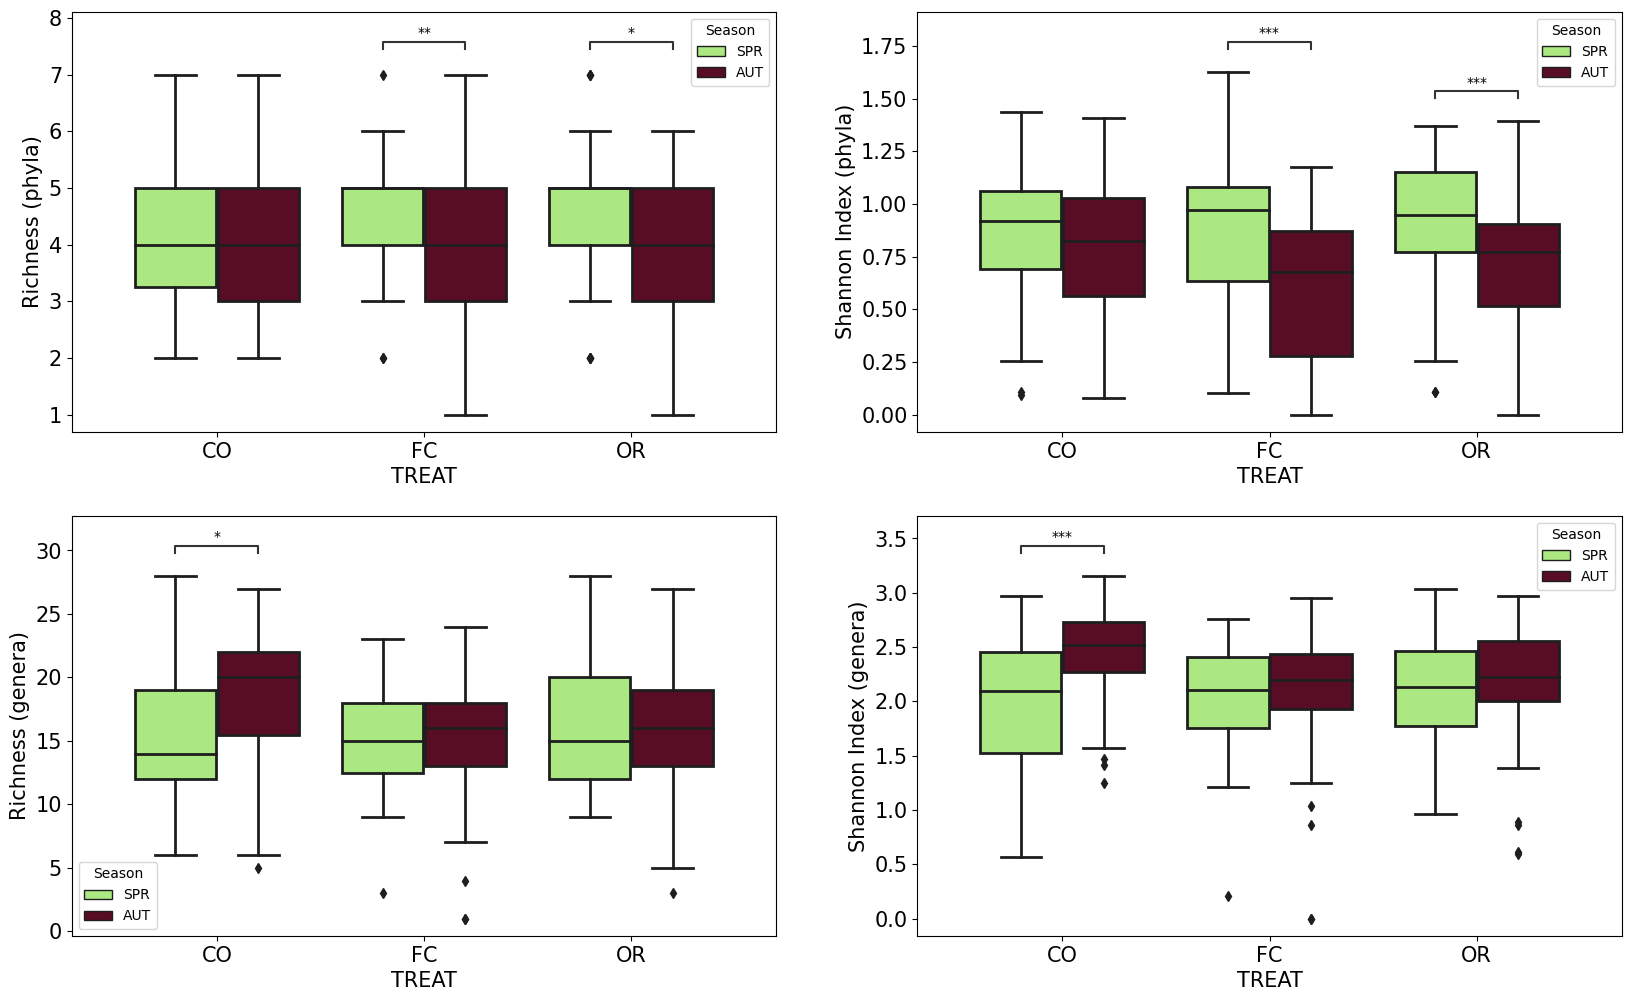

In [396]:
fig, ax = plt.subplots(2,2, figsize = (2*10, 2*6))
ax = ax.reshape(-1)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

for i, ab in enumerate( ["Richness", "Shannon_Index"] ):

    plotting_parameters = {
        'data':    df_ab_mod,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    ax[i] = sns.boxplot(**plotting_parameters, ax=ax[i], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]

    annotator = Annotator(ax[i], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i].tick_params(labelsize = 15)
    ax[i].set_xlabel("TREAT", fontsize = 15)

    ax[0].set_ylabel("Richness (phyla)", fontsize = 15)
    ax[1].set_ylabel("Shannon Index (phyla)", fontsize = 15)

for i, ab in enumerate( ["Richness_genera", "Shannon_Index_genera"] ):

    plotting_parameters = {
        'data':    df_genera,
        'x':       'TREAT',
        'y':       ab,
        'hue':     'Season'
    }
    
    ax[i+2] = sns.boxplot(**plotting_parameters, ax=ax[i+2], palette = palette, linewidth=2)

    pairs = [(("CO", "SPR"),("CO", "AUT")),
            (("FC", "SPR"),("FC", "AUT")),
            (("OR", "SPR"),("OR", "AUT"))]
    
    annotator = Annotator(ax[i+2], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()
    
    ax[i+2].tick_params(labelsize = 15)
    ax[i+2].set_xlabel("TREAT", fontsize = 15)
    
    ax[2].set_ylabel("Richness (genera)", fontsize = 15)
    ax[3].set_ylabel("Shannon Index (genera)", fontsize = 15)

# PRODUCE TABLE with MEANS and ERROR 

In [397]:
df_spr = df_ab_mod[ df_ab_mod["Season"] == "SPR" ]
df_aut = df_ab_mod[ df_ab_mod["Season"] == "AUT" ]

In [398]:
# Compute mean and standard error of phyla abundances, abiotic parameters and community indices (shannon's entropy and richness)

means_spr = df_spr.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).mean()
stds_spr = df_spr.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).std()

means_aut = df_aut.drop(columns = ["SITE", "Season"]).groupby(["TREAT"]).mean()
stds_aut = df_aut.drop(columns =["SITE", "Season"]).groupby(["TREAT"]).std()

num_samples = len( df_aut[ df_aut["TREAT"] == "FC"] )

err_spr = stds_spr/np.sqrt(num_samples)
err_aut = stds_aut/np.sqrt(num_samples)

means_spr.replace(0.00, 0.01, inplace = True)
means_aut.replace(0.00, 0.01, inplace = True)

err_spr.replace(0.00, 0.01, inplace = True)
err_aut.replace(0.00, 0.01, inplace = True)

In [399]:
# write a table and print it in latex format (SPRING)

table = means_spr.combine(err_spr, lambda x, y: np.array([f"{x[i]:.2f} $\pm$ {y[i]:.2f}" for i in range(3)]))
latex_table = table.T.to_latex(escape=False)
print(latex_table)

\begin{tabular}{llll}
\toprule
TREAT &                CO &                FC &                OR \\
\midrule
Richness          &   4.19 $\pm$ 0.19 &   4.49 $\pm$ 0.17 &   4.69 $\pm$ 0.19 \\
Shannon_Index     &   0.85 $\pm$ 0.05 &   0.87 $\pm$ 0.05 &   0.92 $\pm$ 0.05 \\
SM                &  17.66 $\pm$ 2.22 &  23.08 $\pm$ 2.90 &  19.53 $\pm$ 2.16 \\
OM                &   2.67 $\pm$ 0.24 &   2.80 $\pm$ 0.26 &   4.12 $\pm$ 0.53 \\
EC                &   0.25 $\pm$ 0.03 &   0.46 $\pm$ 0.05 &   0.24 $\pm$ 0.02 \\
pH                &   8.07 $\pm$ 0.18 &   8.02 $\pm$ 0.18 &   8.36 $\pm$ 0.03 \\
TN                &   0.07 $\pm$ 0.01 &   0.08 $\pm$ 0.01 &   0.05 $\pm$ 0.01 \\
OC                &   0.92 $\pm$ 0.10 &   0.96 $\pm$ 0.12 &   0.68 $\pm$ 0.06 \\
CN                &  12.34 $\pm$ 0.54 &  12.77 $\pm$ 0.60 &  15.37 $\pm$ 1.19 \\
Ascomycota        &   0.57 $\pm$ 0.04 &   0.61 $\pm$ 0.03 &   0.57 $\pm$ 0.03 \\
Basidiomycota     &   0.14 $\pm$ 0.03 &   0.09 $\pm$ 0.02 &   0.08 $\pm$ 0.02 \\


C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\2869387880.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table.T.to_latex(escape=False)


In [400]:
# write a table and print it in latex format (AUTUMN)

table = means_aut.combine(err_aut, lambda x, y: np.array([f"{x[i]:.2f} $\pm$ {y[i]:.2f}" for i in range(3)]))
latex_table = table.T.to_latex(escape=False)
print(latex_table)

\begin{tabular}{llll}
\toprule
TREAT &                CO &               FC &                OR \\
\midrule
Richness          &   4.35 $\pm$ 0.23 &  3.74 $\pm$ 0.23 &   4.02 $\pm$ 0.21 \\
Shannon_Index     &   0.80 $\pm$ 0.05 &  0.60 $\pm$ 0.06 &   0.70 $\pm$ 0.05 \\
SM                &   7.17 $\pm$ 1.08 &  9.82 $\pm$ 1.16 &  11.82 $\pm$ 1.26 \\
OM                &   3.30 $\pm$ 0.39 &  2.62 $\pm$ 0.27 &   2.95 $\pm$ 0.31 \\
EC                &   0.22 $\pm$ 0.02 &  0.43 $\pm$ 0.04 &   0.60 $\pm$ 0.06 \\
pH                &   7.91 $\pm$ 0.04 &  7.64 $\pm$ 0.27 &   8.04 $\pm$ 0.05 \\
TN                &   0.06 $\pm$ 0.01 &  0.06 $\pm$ 0.01 &   0.07 $\pm$ 0.01 \\
OC                &   0.72 $\pm$ 0.09 &  0.59 $\pm$ 0.07 &   0.74 $\pm$ 0.09 \\
CN                &  11.19 $\pm$ 1.13 &  9.01 $\pm$ 0.92 &   9.69 $\pm$ 0.95 \\
Ascomycota        &   0.70 $\pm$ 0.03 &  0.80 $\pm$ 0.02 &   0.72 $\pm$ 0.03 \\
Basidiomycota     &   0.17 $\pm$ 0.02 &  0.04 $\pm$ 0.01 &   0.04 $\pm$ 0.01 \\
Chytridiomyc

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\749340086.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table.T.to_latex(escape=False)


# DUNCAN TEST for DIFFERENCES AMONG PAIRS OF TREATMENTS

In [472]:
def annotate_duncan_test(result, means):

    co_fc = result["FC"][0]
    co_or = result["OR"][0]
    fc_or = result["OR"][1]
    results = [co_fc, co_or, fc_or]
    annot = ["", "", ""]

    if np.count_nonzero(results) == 1:
        
        if co_fc:
            if means["CO"] < means["FC"]:
                annot = ["a", "b", ""]
            else:
                annot = ["b", "a", ""]   
        elif co_or:
            if means["CO"] < means["OR"]:
                annot = ["a", "", "b"]  
            else:
                annot = ["b", "", "a"]
        else: 
            if means["FC"] < means["OR"]:
                annot = ["", "a", "b"]
            else:
                annot = ["", "b", "a"]  

    elif np.count_nonzero(results) == 2:
        if not co_fc:
            if means["FC"] < means["OR"]:
                annot = ["a", "a", "b"]    
            else:  
                annot = ["b", "b", "a"]   
        elif not co_or:
            if means["CO"] < means["FC"]:
                annot = ["a", "b", "a"]
            else:    
                annot = ["b", "a", "b"]
        else:
            if means["CO"] < means["FC"]:
                annot = ["a", "b", "b"] 
            else: 
                annot = ["b", "a", "a"]       

    elif np.count_nonzero(results) == 3:
        annot = ["a", "b", "c"]
        print(means)
        annot = [letter for _, letter in sorted(zip(means, annot))]  

    return annot

In [404]:
# select season
season  = "SPR"

parameter = "TREAT"

nodes =  ["SM",
          "OM", 
          "EC", 
          "pH", 
          'TN', 
          'OC', 
          'CN',
          'Ascomycota', 
          'Basidiomycota',
          'Chytridiomycota',
          'Glomeromycota',
          'Mortierellomycota',
          'Mucoromycota',
          'Rozellomycota',
          'uni']

for node in nodes:
    if season == "SPR":
        result, anova_table = duncan_test(df_spr, node, parameter)
    elif season == "AUT":
        result, anova_table = duncan_test(df_aut, node, parameter)

    print(node)
    print(df_spr.groupby(["TREAT"]).mean()[node]) 
    print(result)
    print(annotate_duncan_test(result, means_spr[node]))
    print()

SM
TREAT
CO    17.656855
FC    23.079967
OR    19.528527
Name: SM, dtype: float64
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False
['', '', '']

OM
TREAT
CO    2.668536
FC    2.803057
OR    4.124976
Name: OM, dtype: float64
TREAT     CO     FC     OR
TREAT                     
CO     False  False   True
FC     False  False   True
OR     False  False  False
['a', 'a', 'b']

EC
TREAT
CO    0.250574
FC    0.459608
OR    0.242076
Name: EC, dtype: float64
TREAT     CO     FC     OR
TREAT                     
CO     False   True  False
FC     False  False   True
OR     False  False  False
['a', 'b', 'a']

pH
TREAT
CO    8.068889
FC    8.019216
OR    8.362549
Name: pH, dtype: float64
TREAT     CO     FC     OR
TREAT                     
CO     False  False  False
FC     False  False  False
OR     False  False  False
['', '', '']

TN
TREAT
CO    0.072592
FC    0.078385
OR    0.050124
Name: TN, dtype: float64


C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\4264873170.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_spr.groupby(["TREAT"]).mean()[node])
C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\4264873170.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_spr.groupby(["TREAT"]).mean()[node])
C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\4264873170.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu

# RDA Table

In [405]:
# results from permanova test in R 

# Define the data as a dictionary
data = {
    "Factor": [
        "SITE", "TREAT", "Season", "S.M", "OM", 
        "EC-(ds/m)", "pH", "TN-(%)", "OC-(%)", "C:N", "Residual"
    ],
    "Df": [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 276],
    "Variance (%)": [
        13.370016, 63.245084, 86.204008, 20.511613, 7.709903, 
        3.701730, 4.187200, 6.529559, 5.220867, 3.330829, 956.283632
    ],
    "F": [
        3.8588178, 9.1268127, 24.8799680, 5.9200064, 2.2252115, 
        1.0683833, 1.2084984, 1.8845436, 1.5068324, 0.9613348, None
    ],
    "Pr(>F)": [
        0.023, 0.001, 0.001, 0.003, 0.086, 
        0.337, 0.276, 0.142, 0.190, 0.391, None
    ]
}

# Convert to a DataFrame
permanova_table = pd.DataFrame(data)

In [406]:
tot_var = 1170.3 # from rda in R 
permanova_table["Variance (%)"] = permanova_table["Variance (%)"]/tot_var 

In [407]:
permanova_table_latex = permanova_table.to_latex(escape=False)
print(permanova_table_latex)

\begin{tabular}{llrrrr}
\toprule
{} &     Factor &   Df &  Variance (%) &          F &  Pr(>F) \\
\midrule
0  &       SITE &    1 &      0.011424 &   3.858818 &   0.023 \\
1  &      TREAT &    2 &      0.054042 &   9.126813 &   0.001 \\
2  &     Season &    1 &      0.073660 &  24.879968 &   0.001 \\
3  &        S.M &    1 &      0.017527 &   5.920006 &   0.003 \\
4  &         OM &    1 &      0.006588 &   2.225211 &   0.086 \\
5  &  EC-(ds/m) &    1 &      0.003163 &   1.068383 &   0.337 \\
6  &         pH &    1 &      0.003578 &   1.208498 &   0.276 \\
7  &     TN-(%) &    1 &      0.005579 &   1.884544 &   0.142 \\
8  &     OC-(%) &    1 &      0.004461 &   1.506832 &   0.190 \\
9  &        C:N &    1 &      0.002846 &   0.961335 &   0.391 \\
10 &   Residual &  276 &      0.817127 &        NaN &     NaN \\
\bottomrule
\end{tabular}



C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\293227030.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  permanova_table_latex = permanova_table.to_latex(escape=False)


# PHYLA ABUNDANCES ARE WEAKLY DEPENDENT ON SITE ...

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N vs. S: t-test independent samples, P_val:6.810e-04 t=3.435e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03


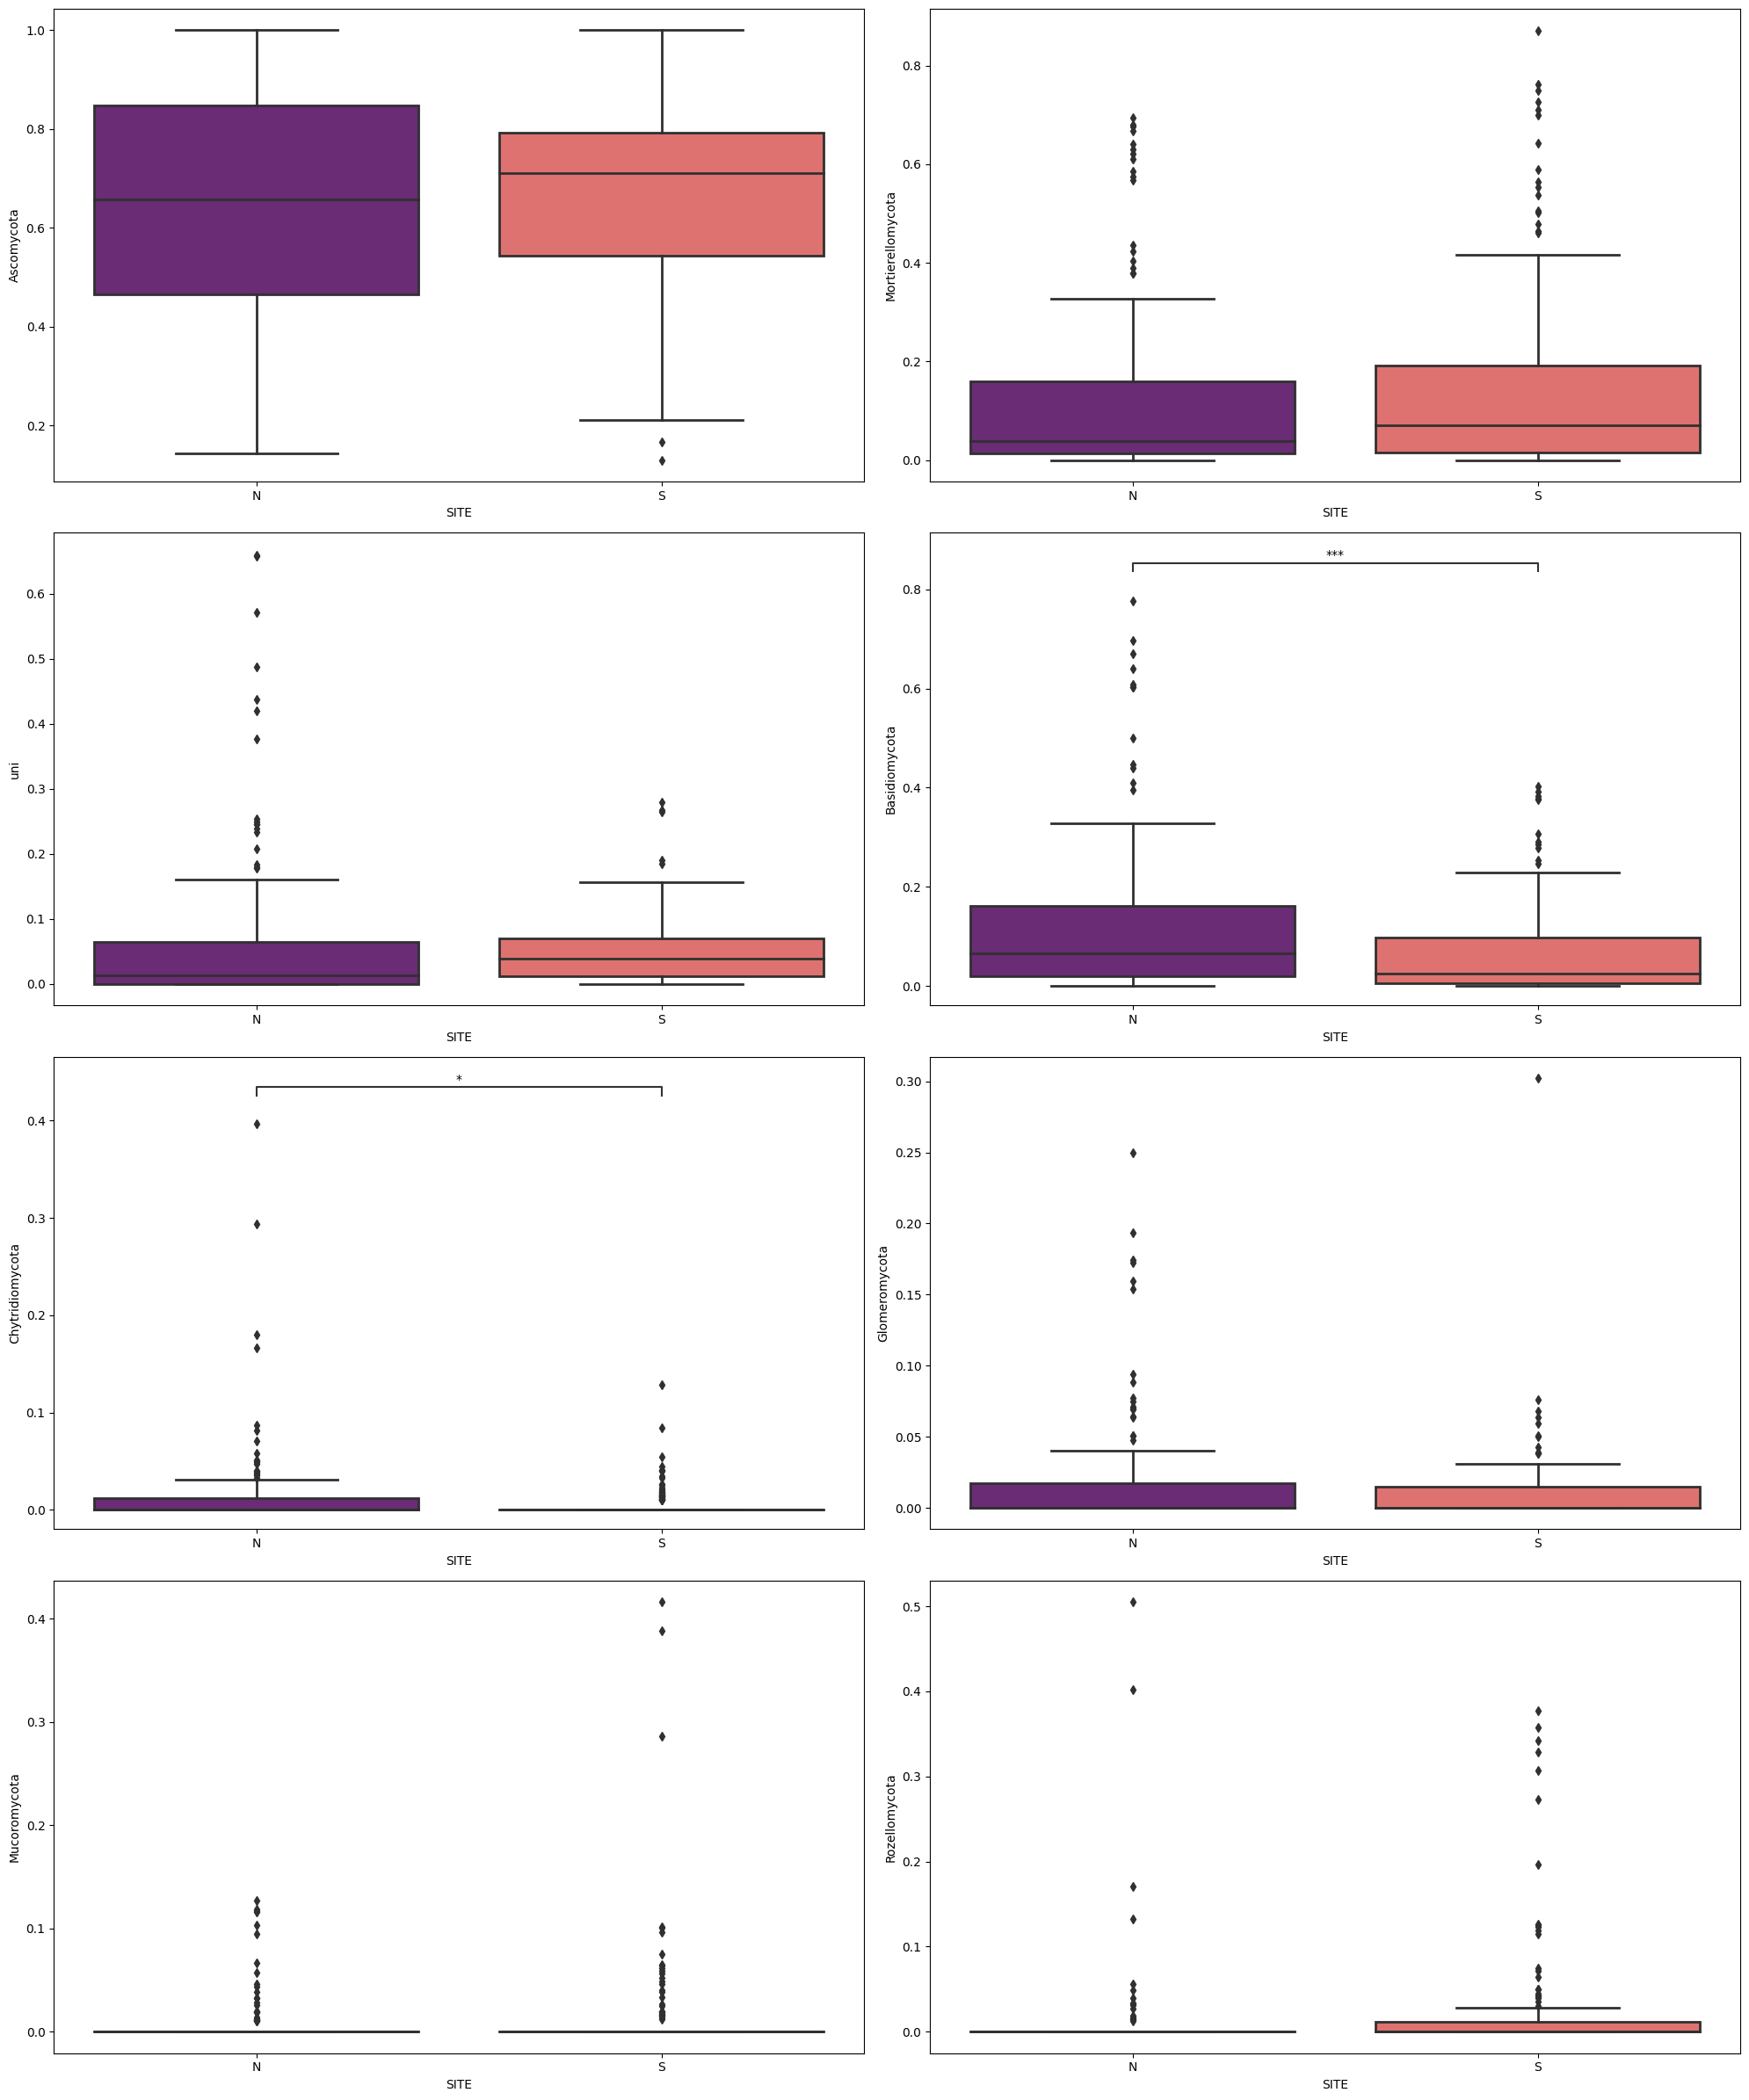

In [408]:
fig, axx = plt.subplots(4, 2, figsize=(2*10, 4*6), tight_layout=True)
axx = axx.reshape(-1)

pairs = [("N", "S")]

for ax, node in zip(axx, phyla_list):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'SITE',
        'y':       node
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

plt.savefig("comparison_sites.pdf", bbox_inches = 'tight')    

## but if we compare without averaging over the seasons, the differences are not so small

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_SPR vs. S_SPR: t-test independent samples, P_val:4.587e-03 t=-2.877e+00
N_AUT vs. S_AUT: t-test independent samples, P_val:2.791e-02 t=2.224e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_AUT vs. S_AUT: t-test independent samples, P_val:7.706e-03 t=-2.707e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N_SPR vs. S

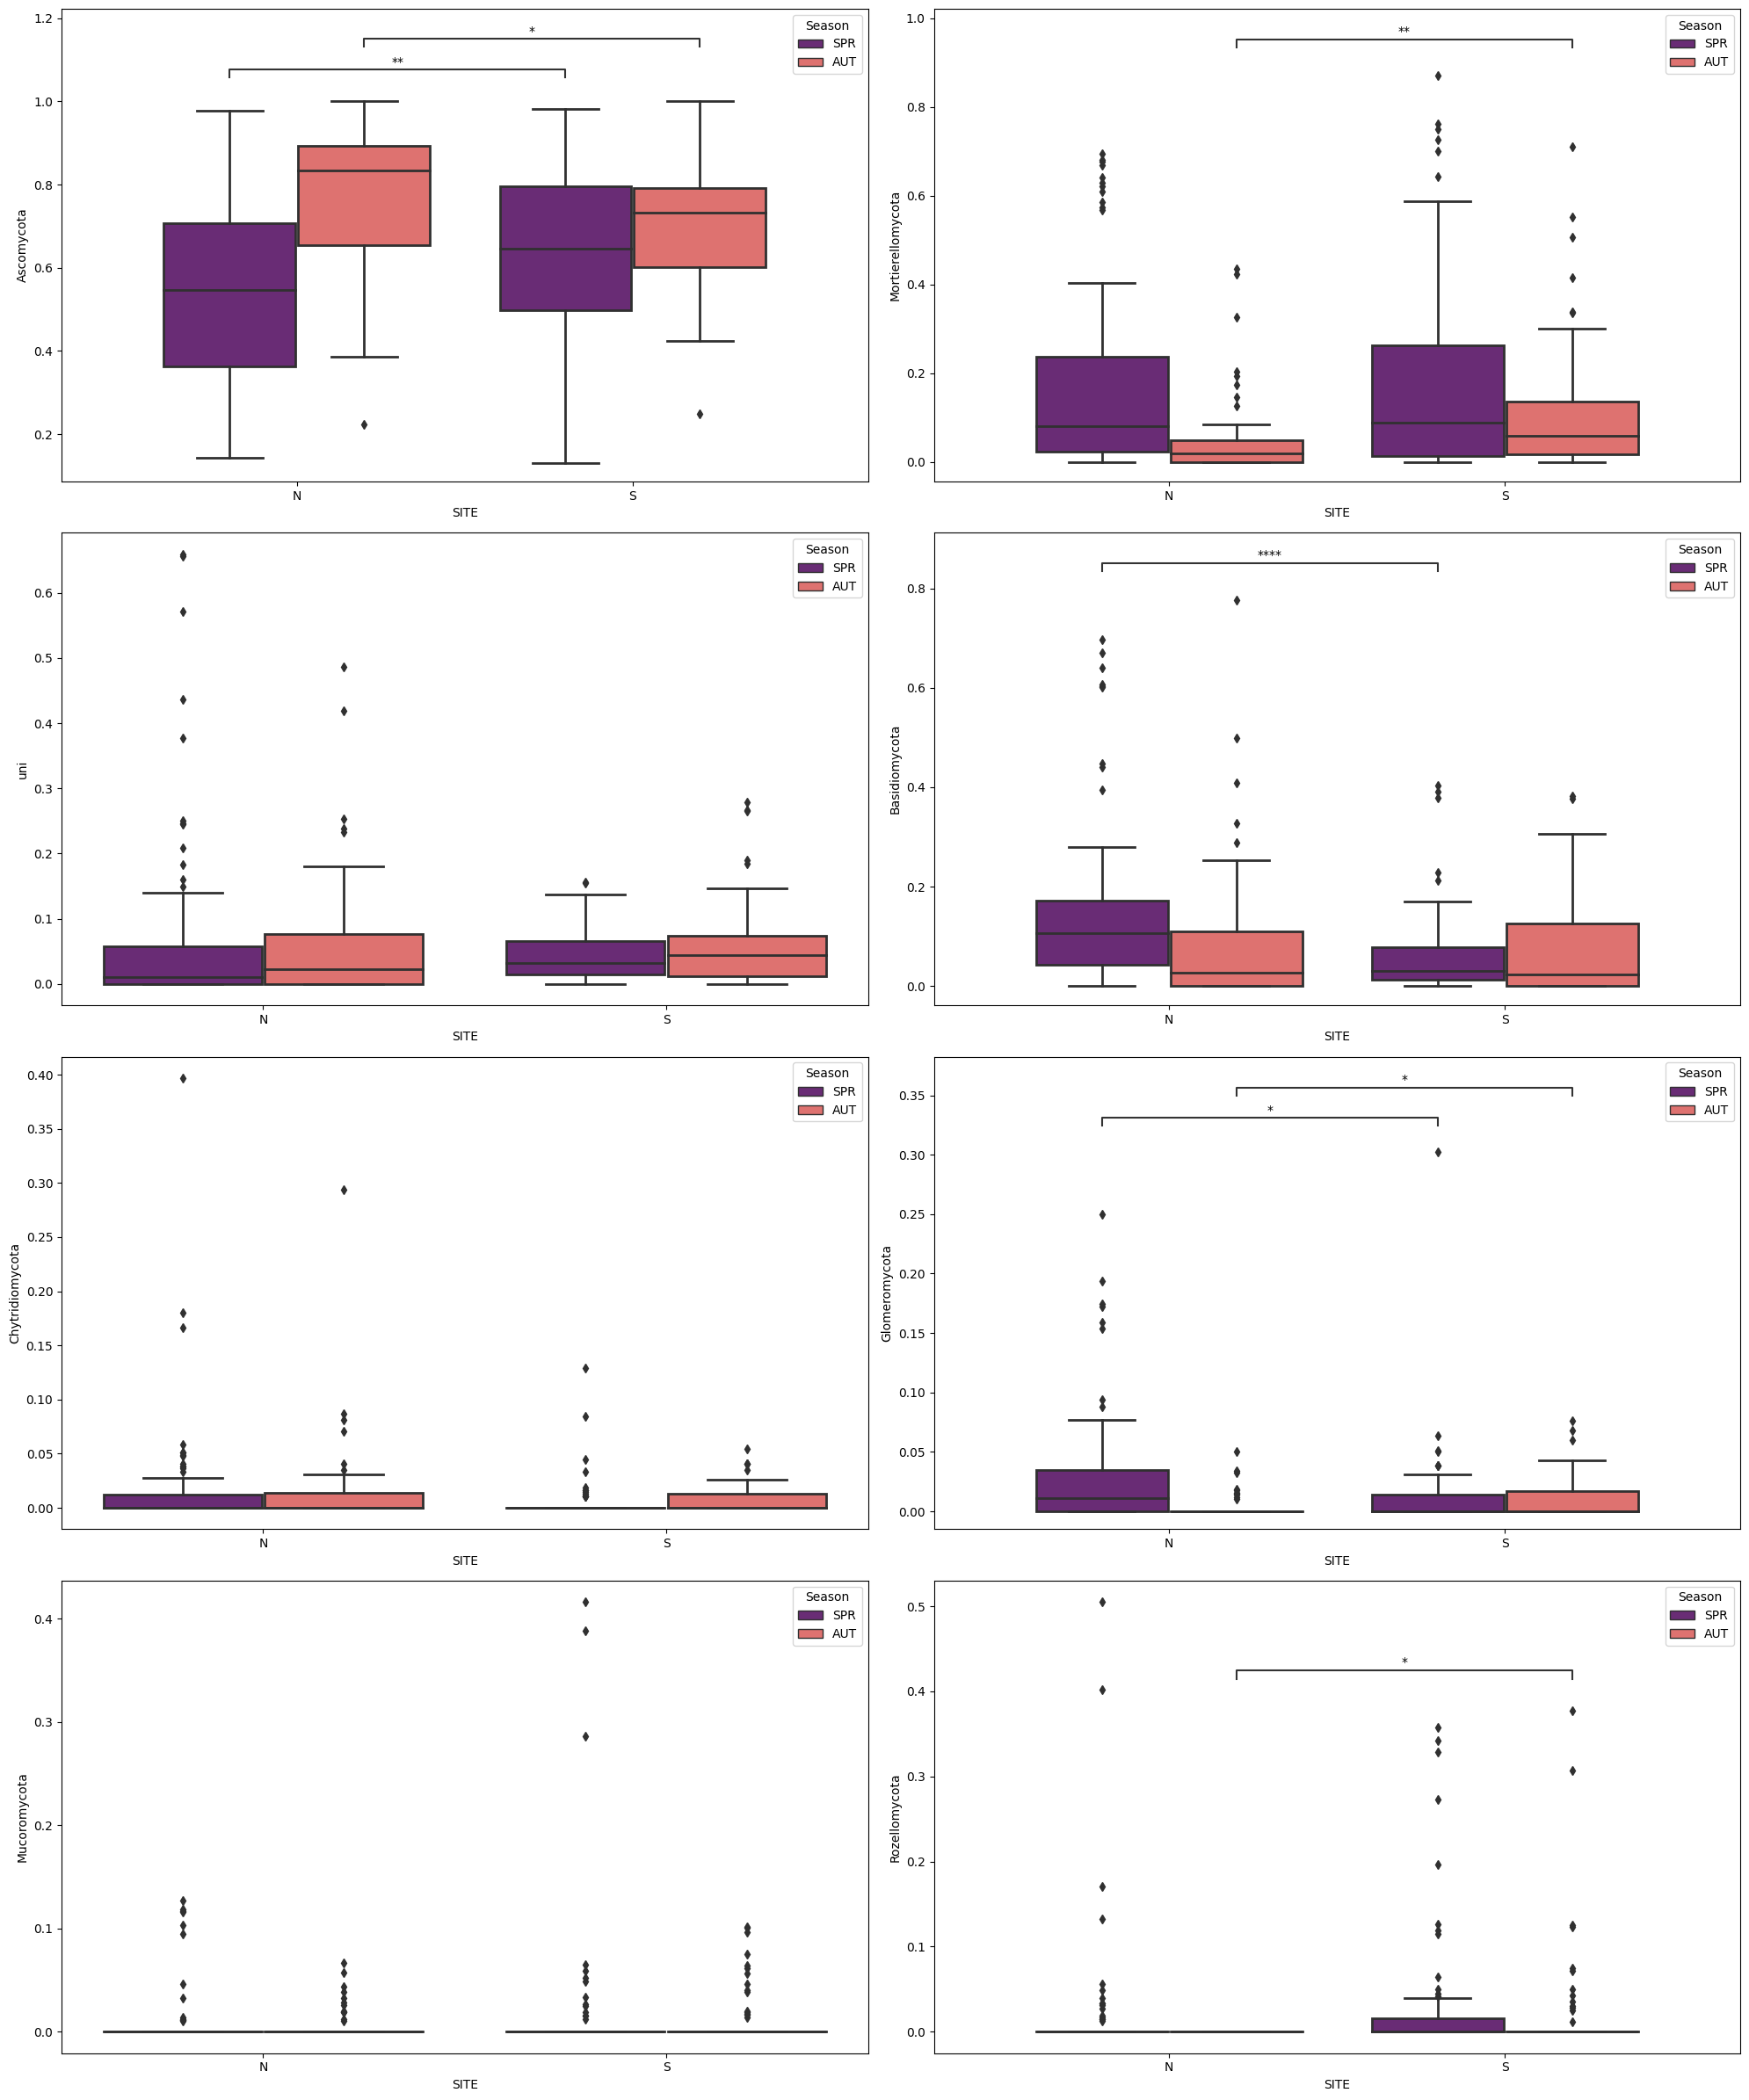

In [409]:
fig, axx = plt.subplots(4, 2, figsize=(2*10, 4*6), tight_layout=True)
axx = axx.reshape(-1)

pairs = [(("N", "SPR"),("S", "SPR")),
        (("N", "AUT"),("S", "AUT"))]

for ax, node in zip(axx, phyla_list):

    plotting_parameters = {
        'data':    df_ab,
        'x':       'SITE',
        'y':       node,
        'hue': "Season"
    }
    
    ax = sns.boxplot(**plotting_parameters, ax=ax, palette = "magma", linewidth=2)     

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

plt.savefig("comparison_sites_season.pdf", bbox_inches = 'tight')

# SAME PICTURES BUT WITH SITE

## ABIOTIC 

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:2.212e-09 t=7.531e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:1.859e-12 t=9.597e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.130e-06 t=5.587e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.250e-04 t=3.873e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CO_SPR vs. CO_AUT: t-test independent samples, P_val:2.422e-04 t=-3.988e+00
OR_SPR vs. OR_AUT: t-test independent samples, P

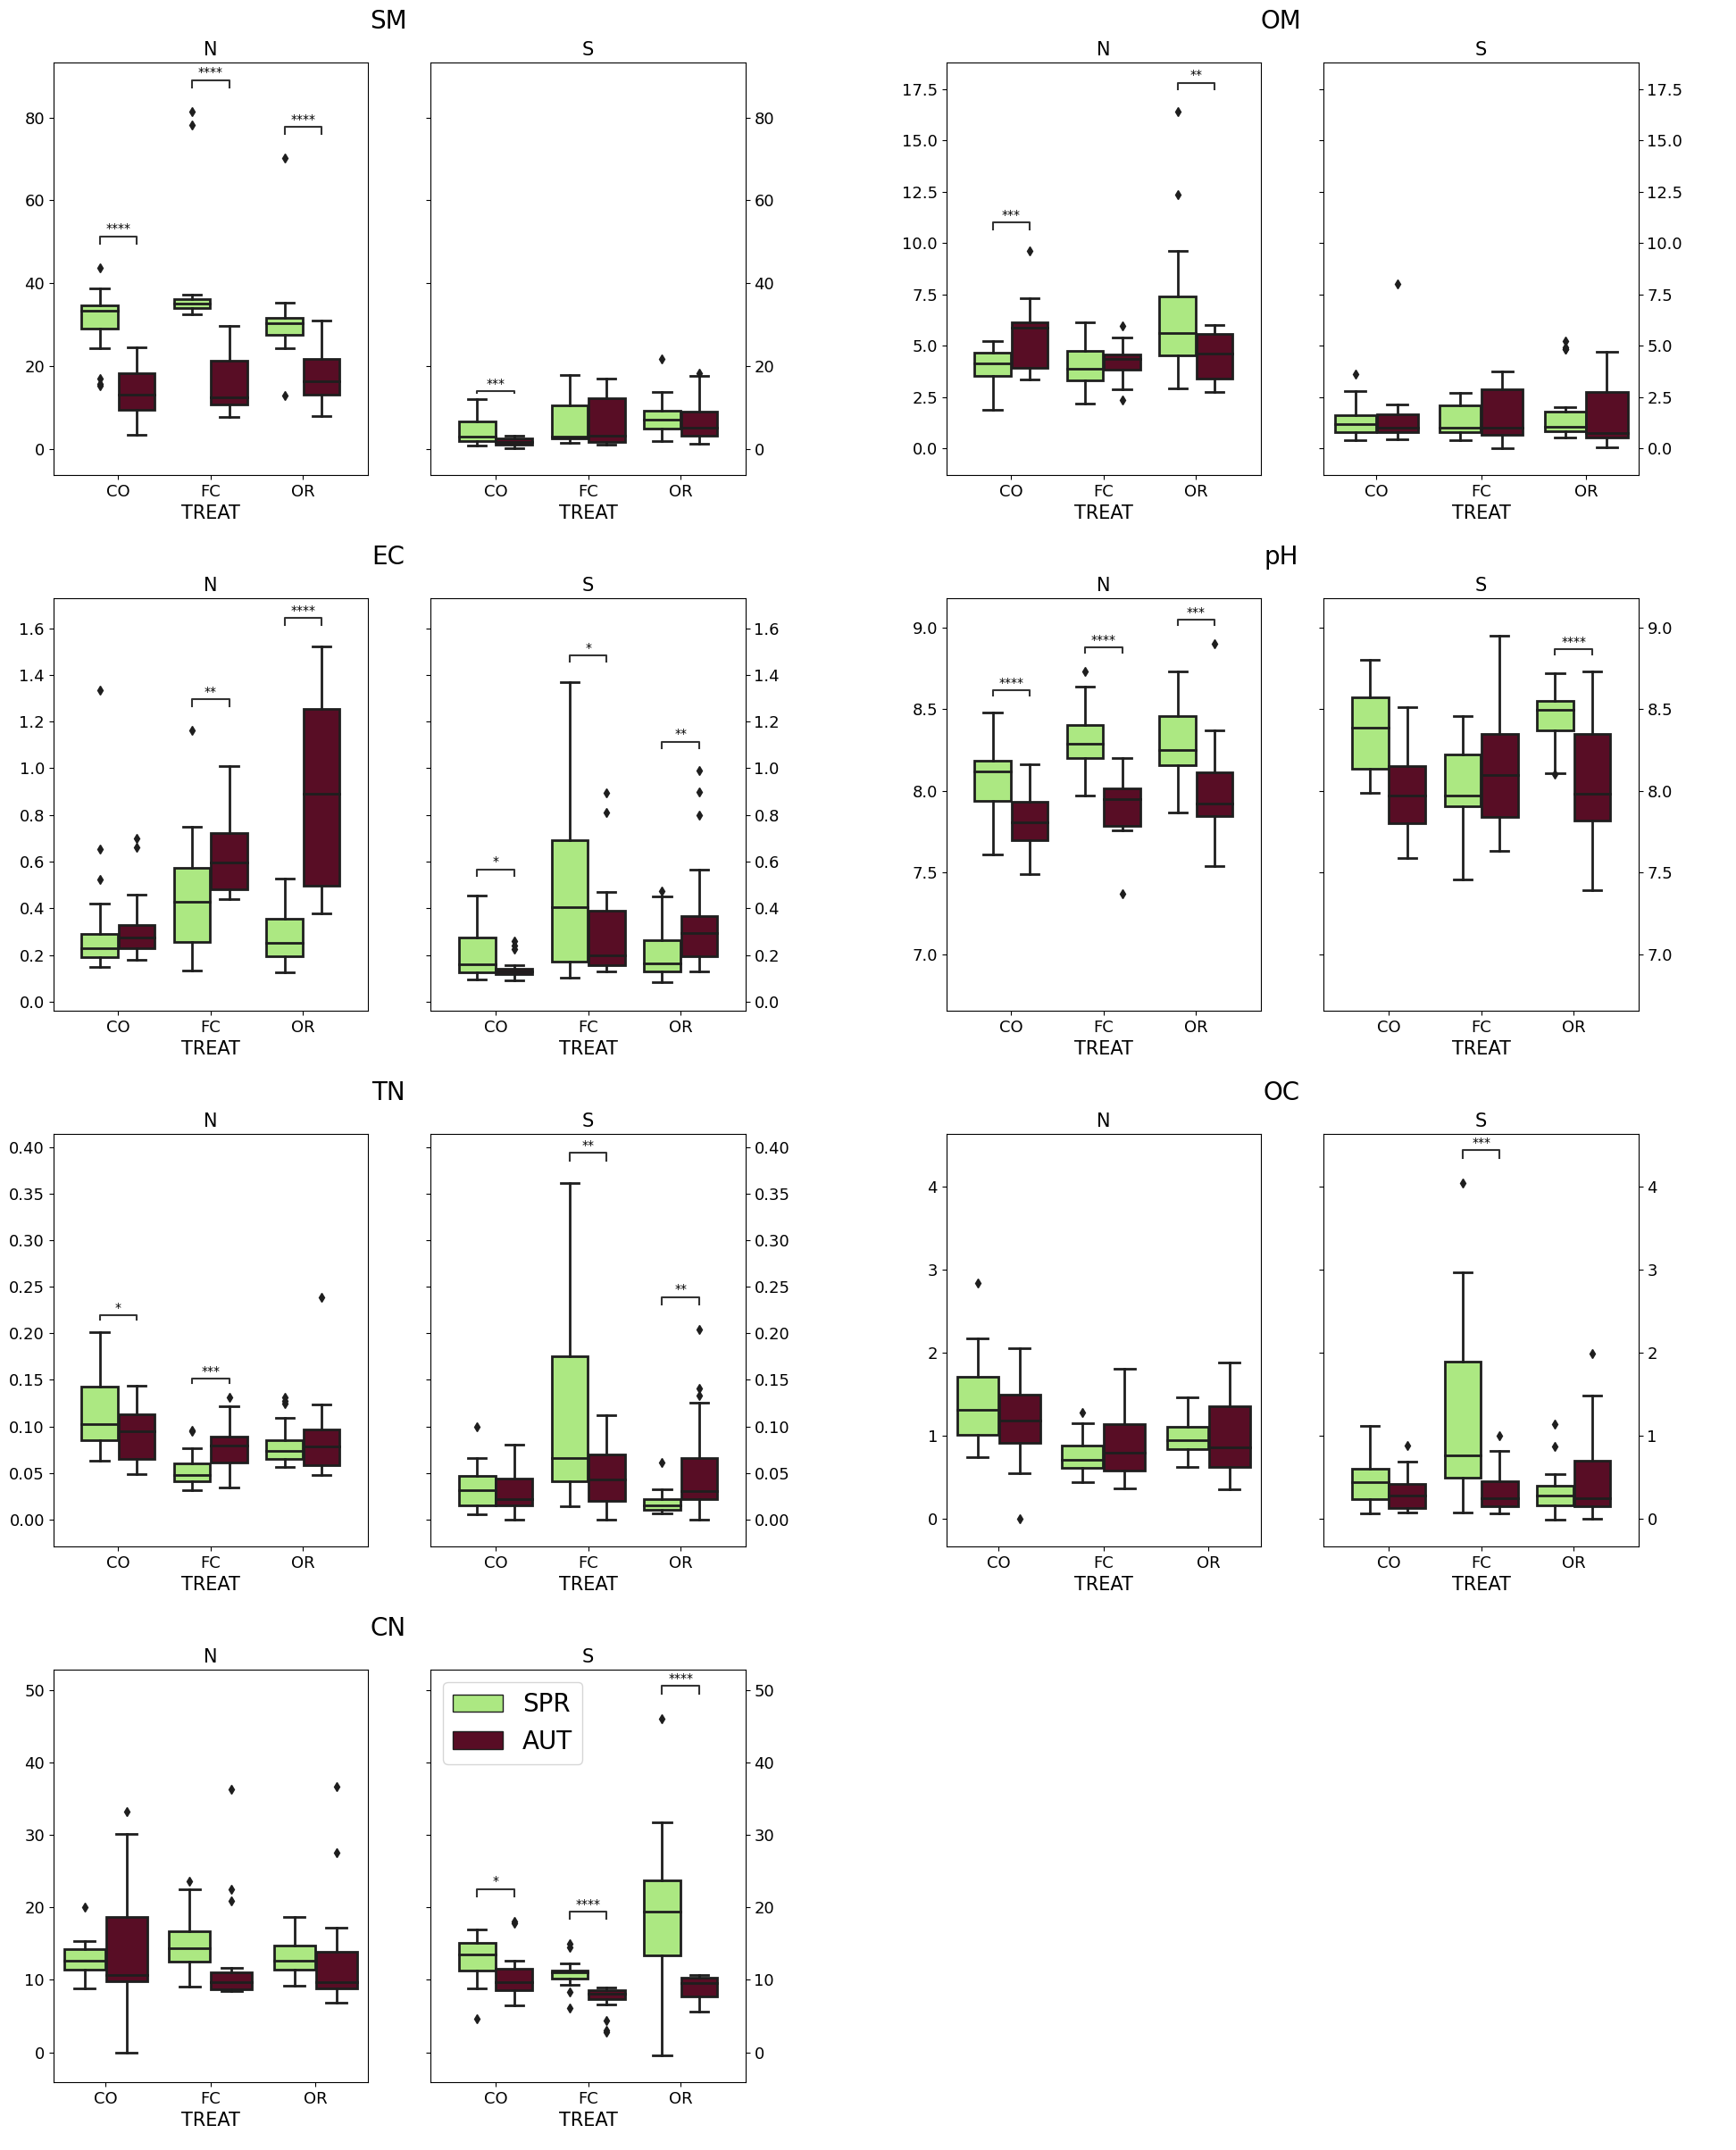

In [410]:
fig = plt.figure(figsize = (2*10, 4*6), layout = 'none')

subfigs = fig.subfigures(4, 2)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

pairs = [(("CO", "SPR"),("CO", "AUT")),
        (("FC", "SPR"),("FC", "AUT")),
        (("OR", "SPR"),("OR", "AUT"))]

for outerind, subfig in enumerate(subfigs.flat[:-1]):
    subfig.suptitle(abiotic_list[outerind], fontsize = 20)
    axs = subfig.subplots(1, 2)

    val_max = np.max(df_ab[abiotic_list[outerind]]) + 0.145*(np.max(df_ab[abiotic_list[outerind]]) - np.min(df_ab[abiotic_list[outerind]]))
    val_min = np.min(df_ab[abiotic_list[outerind]]) - 0.08*np.max(df_ab[abiotic_list[outerind]])

    plotting_parameters = {
        'data':    df_ab[df_ab["SITE"]=="N"],
        'x':       'TREAT',
        'y':       abiotic_list[outerind],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[0], palette = palette, linewidth=2) 
    
    axs.flat[0].set_title('N', fontsize=15)
    axs.flat[0].get_legend().set_visible(False)
    axs.flat[0].set_ylabel(None)
    axs.flat[0].set_xlabel("TREAT", fontsize = 15)
    axs.flat[0].tick_params(axis = 'both', labelsize = 13)

    plotting_parameters = {
        'data':    df_ab_mod[df_ab_mod["SITE"]=="N"],
        'x':       'TREAT',
        'y':       abiotic_list[outerind],
        'hue': "Season"
    }

    annotator = Annotator(axs.flat[0], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[0].set_ylim([val_min, val_max])

    plotting_parameters = {
        'data':    df_ab[df_ab["SITE"]=="S"],
        'x':       'TREAT',
        'y':       abiotic_list[outerind],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[1], palette = palette, linewidth=2)

    axs.flat[1].set_title('S', fontsize = 15)
    axs.flat[1].legend(fontsize = 20)
    if outerind < (len(abiotic_list)-1):
        axs.flat[1].get_legend().set_visible(False)
    axs.flat[1].set_ylabel(None)
    axs.flat[1].set_xlabel("TREAT", fontsize = 15)
    axs.flat[1].tick_params(axis = 'both', labelleft = False, labelright = True, right = True, labelsize = 13)

    plotting_parameters = {
        'data':    df_ab_mod[df_ab_mod["SITE"]=="S"],
        'x':       'TREAT',
        'y':       abiotic_list[outerind],
        'hue': "Season"
    }

    annotator = Annotator(axs.flat[1], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[1].set_ylim([val_min, val_max])

fig.savefig('pictures_paper/abiotic_boxplot_with_sites.pdf', bbox_inches = 'tight')

## PHYLA ABUNDANCES

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:2.399e-05 t=-4.735e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:3.439e-04 t=-3.874e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.305e-03 t=-3.420e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:3.330e-02 t=-2.193e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:4.685e-02 t=2.046e+00
CO_SPR vs. CO_AUT: t-test independent samples

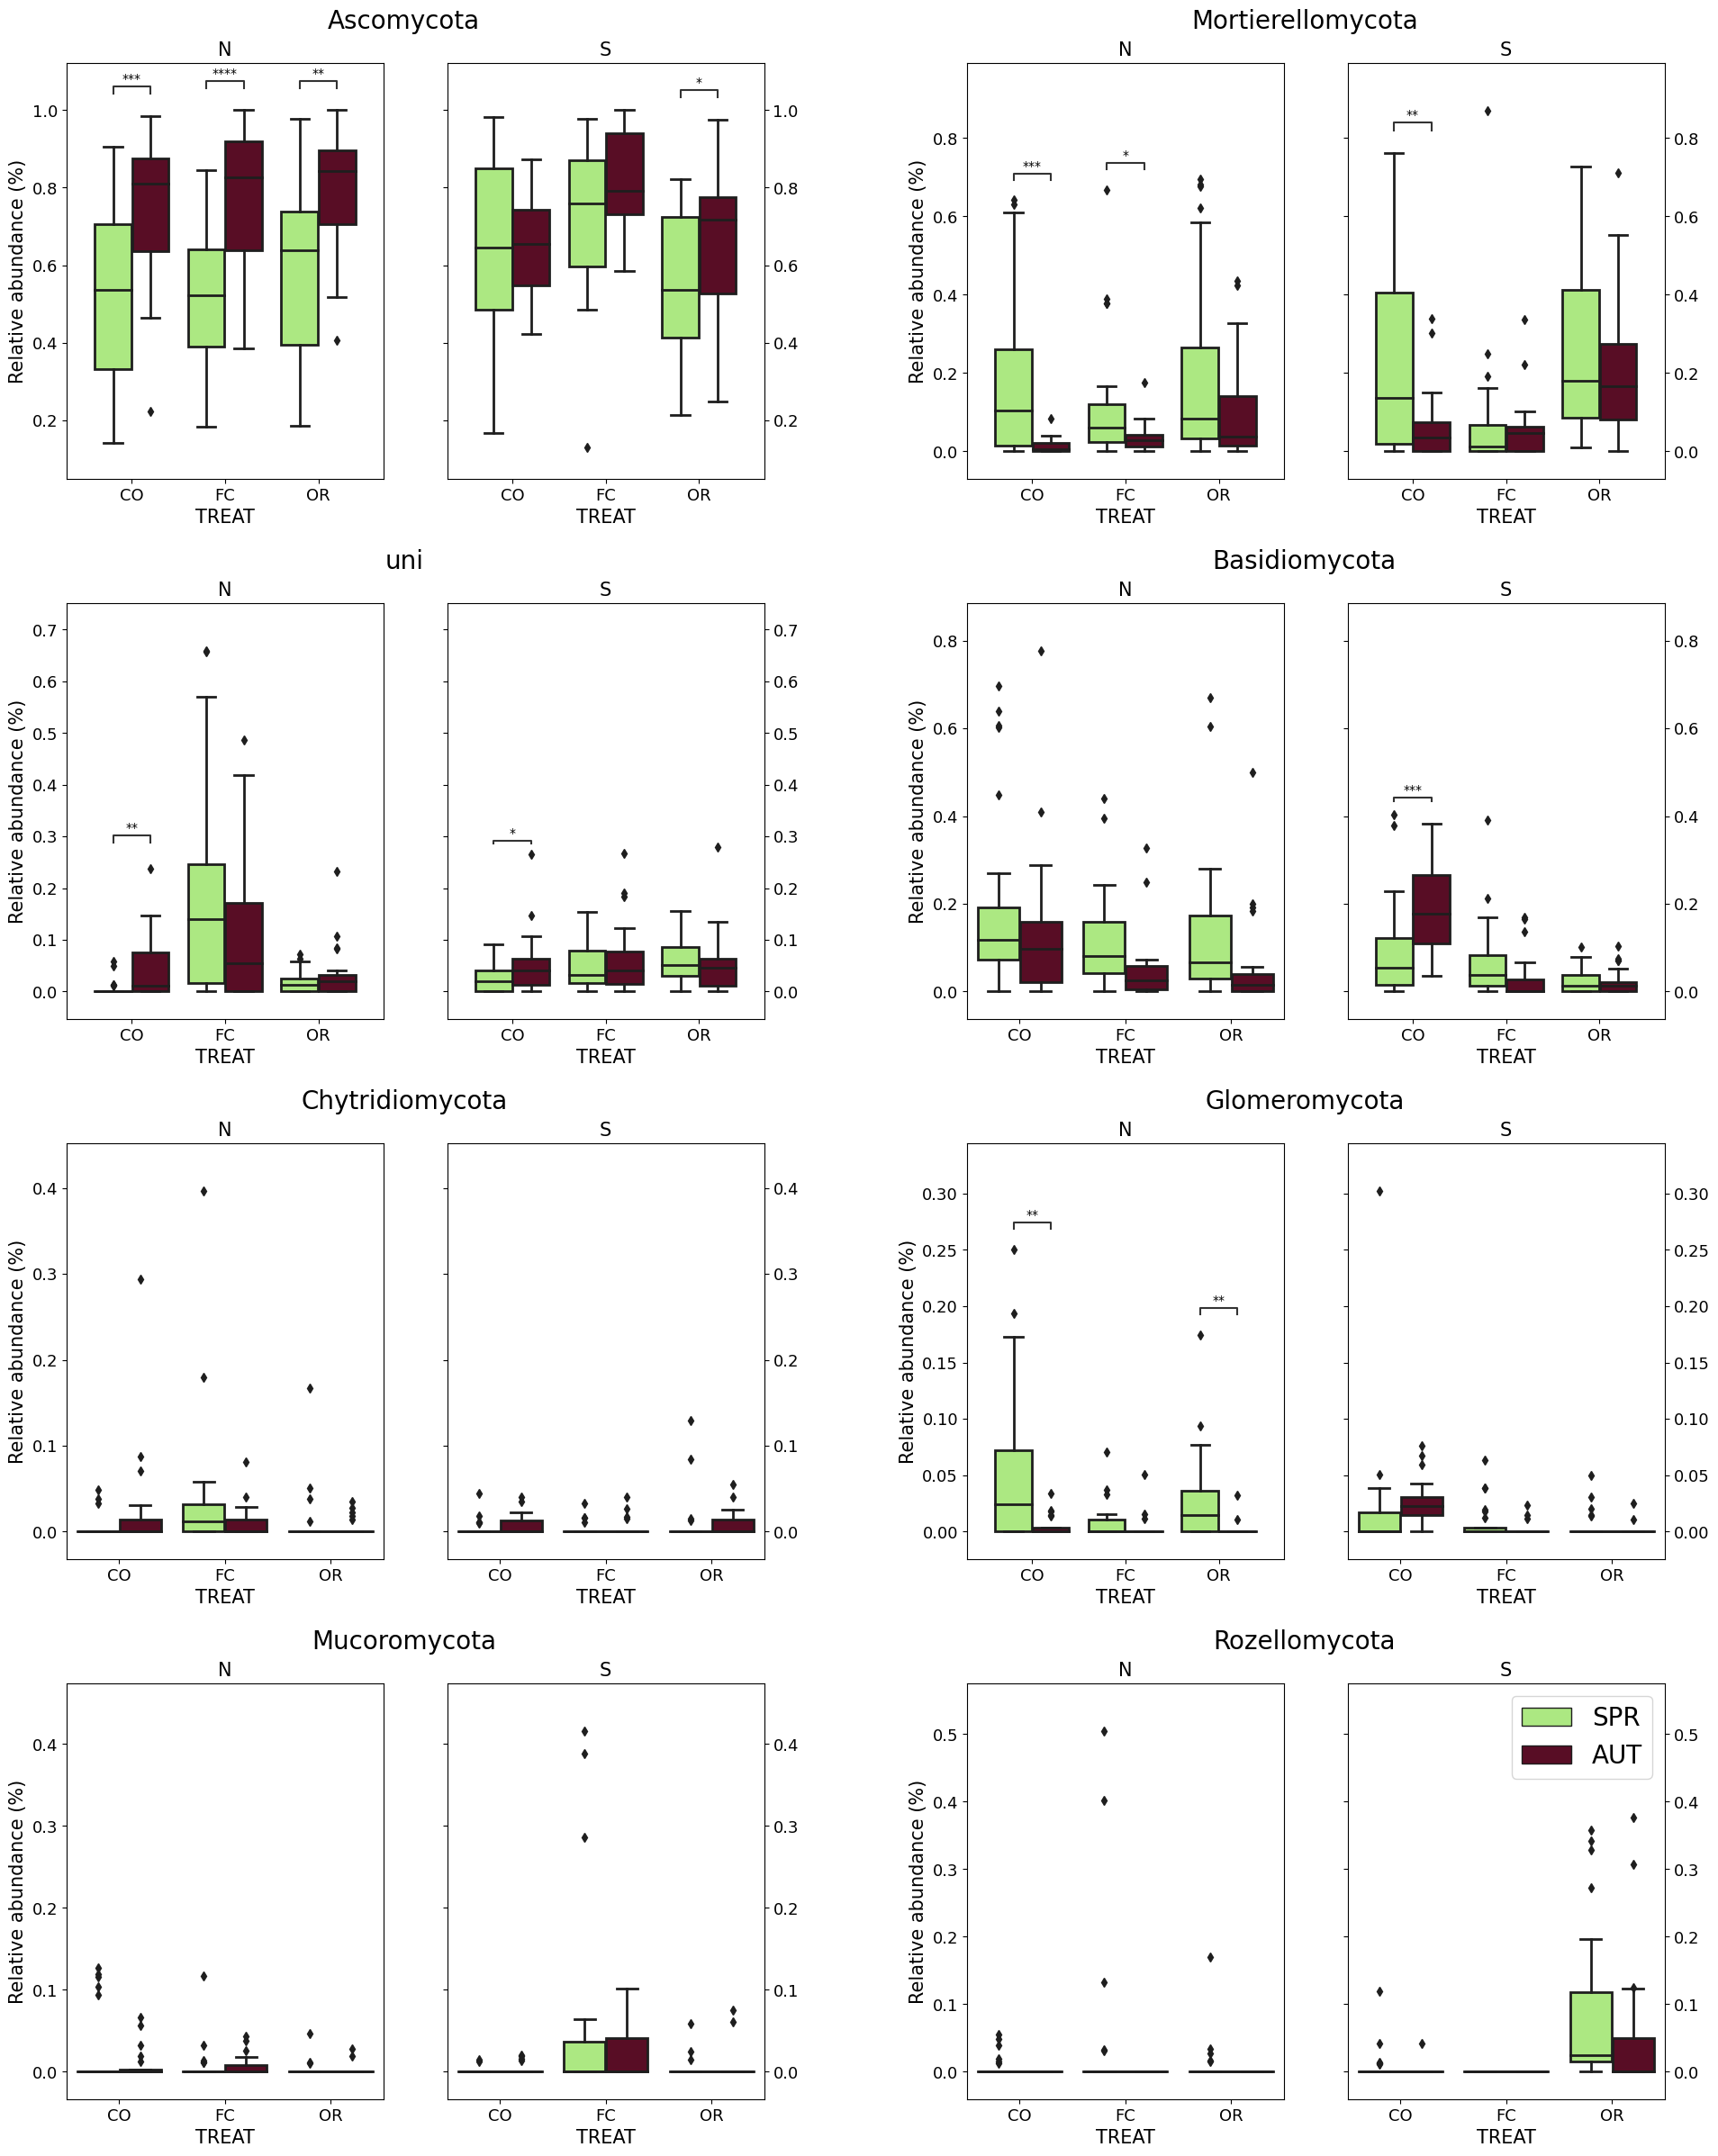

In [411]:
fig = plt.figure(figsize = (2*10, 4*6), layout = 'none')

palette = {"SPR": "#a9f971", "AUT": "#650021"}

subfigs = fig.subfigures(4, 2)

for outerind, subfig in enumerate(subfigs.flat):
    subfig.suptitle(phyla_list[outerind], fontsize = 20)
    axs = subfig.subplots(1, 2)

    val_max = np.max(df_ab[phyla_list[outerind]]) + 0.14*(np.max(df_ab[phyla_list[outerind]]) - np.min(df_ab[phyla_list[outerind]]))
    val_min = np.min(df_ab[phyla_list[outerind]]) - 0.08*np.max(df_ab[phyla_list[outerind]])

    plotting_parameters = {
        'data':    df_ab[df_ab["SITE"]=="N"],
        'x':       'TREAT',
        'y':       phyla_list[outerind],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[0], palette = palette, linewidth=2) 
    axs.flat[0].set_title('N', fontsize=15)

    axs.flat[0].get_legend().set_visible(False)
    axs.flat[0].set_ylabel("Relative abundance (%)", fontsize = 15)
    axs.flat[0].set_xlabel("TREAT", fontsize = 15)
    axs.flat[0].tick_params(axis = 'both', labelsize = 13)

    annotator = Annotator(axs.flat[0], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[0].set_ylim([val_min, val_max])

    plotting_parameters = {
        'data':    df_ab[df_ab["SITE"]=="S"],
        'x':       'TREAT',
        'y':       phyla_list[outerind],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[1], palette = palette, linewidth=2) 

    axs.flat[1].set_title('S', fontsize = 15)
    axs.flat[1].legend(fontsize = 20)
    if outerind < (len(phyla_list)-1):
        axs.flat[1].get_legend().set_visible(False)
    axs.flat[1].set_ylabel(None)
    axs.flat[1].set_xlabel("TREAT", fontsize = 15)
    axs.flat[1].tick_params(axis = 'both', labelleft = False, labelright = True, right = True, labelsize = 13)

    annotator = Annotator(axs.flat[1], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[1].set_ylim([val_min, val_max])

fig.savefig("pictures_paper/phyla_boxplot_with_sites.pdf", bbox_inches = 'tight')

## PHYLA/SHANNON INDEX 

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

OR_SPR vs. OR_AUT: t-test independent samples, P_val:2.232e-02 t=2.363e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FC_SPR vs. FC_AUT: t-test independent samples, P_val:4.424e-05 t=4.545e+00
CO_SPR vs. CO_AUT: t-test independent samples, P_val:9.147e-04 t=3.550e+00
OR_SPR vs. OR_AUT: t-test independent samples, P_val:1.926e-03 t=3.286e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

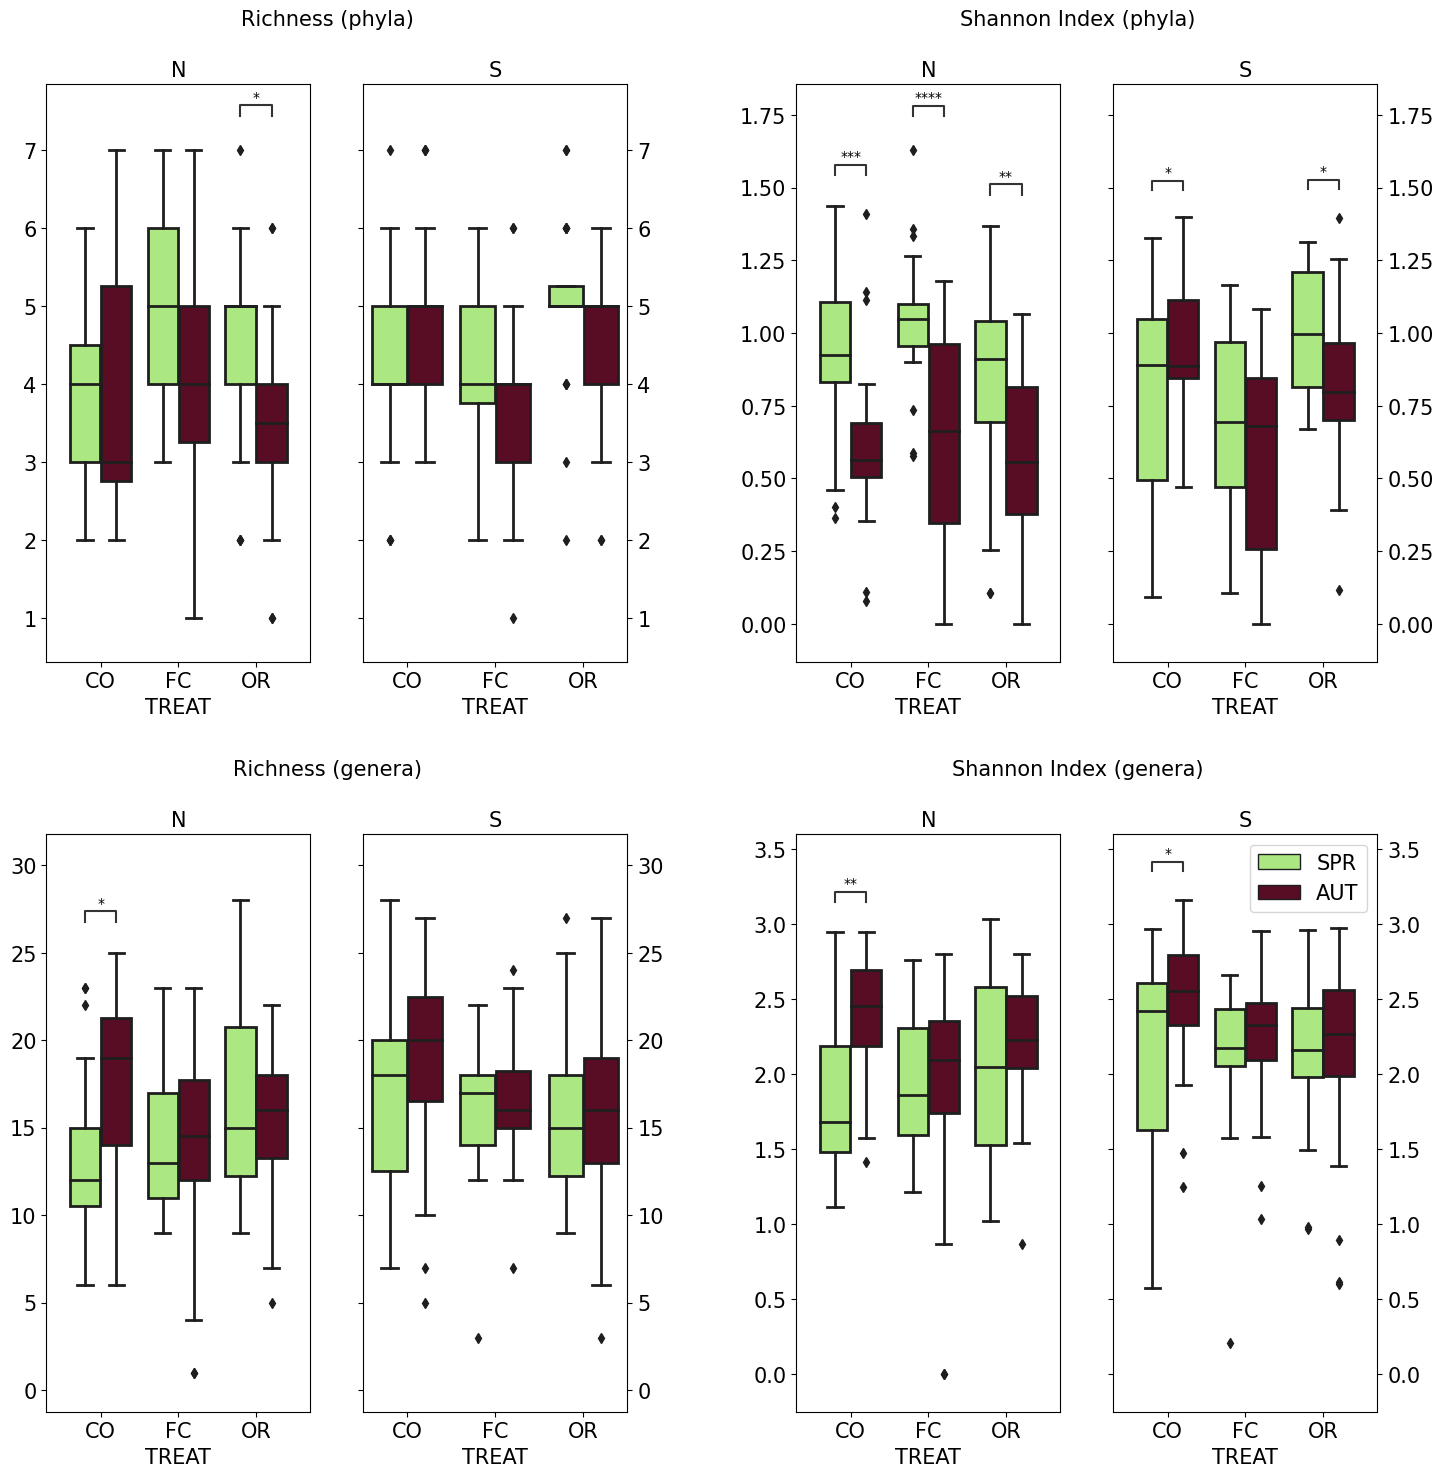

In [413]:
fig = plt.figure(figsize = (15, 15), layout = 'none')

subfigs = fig.subfigures(2, 2)

palette = {"SPR": "#a9f971", "AUT": "#650021"}

pairs = [(("CO", "SPR"),("CO", "AUT")),
        (("FC", "SPR"),("FC", "AUT")),
        (("OR", "SPR"),("OR", "AUT"))]

data_to_plot = [[df_ab_mod[df_ab_mod["SITE"]=="N"], df_ab_mod[df_ab_mod["SITE"]=="S"], "Richness"],
                [df_ab_mod[df_ab_mod["SITE"]=="N"], df_ab_mod[df_ab_mod["SITE"]=="S"], "Shannon_Index"],
                [df_genera[df_genera["SITE"]=="N"], df_genera[df_genera["SITE"]=="S"], "Richness_genera"],
                [df_genera[df_genera["SITE"]=="N"], df_genera[df_genera["SITE"]=="S"], "Shannon_Index_genera"]
                ]

community_idx = ["Richness (phyla)",
                 "Shannon Index (phyla)",
                 "Richness (genera)",
                 "Shannon Index (genera)"
                 ]

for outerind, subfig in enumerate(subfigs.flat):
    subfig.suptitle(community_idx[outerind], fontsize = 15)
    axs = subfig.subplots(1, 2)

    if outerind < 2:
        val_max = np.max(df_ab_mod[data_to_plot[outerind][2]]) + 0.14*(np.max(df_ab_mod[data_to_plot[outerind][2]]) - np.min(df_ab_mod[data_to_plot[outerind][2]]))
        val_min = np.min(df_ab_mod[data_to_plot[outerind][2]]) - 0.08*np.max(df_ab_mod[data_to_plot[outerind][2]])
    else:
        val_max = np.max(df_genera[data_to_plot[outerind][2]]) + 0.14*(np.max(df_genera[data_to_plot[outerind][2]]) - np.min(df_genera[data_to_plot[outerind][2]]))
        val_min = np.min(df_genera[data_to_plot[outerind][2]]) - 0.08*np.max(df_genera[data_to_plot[outerind][2]])

    plotting_parameters = {
        'data':    data_to_plot[outerind][0],
        'x':       'TREAT',
        'y':       data_to_plot[outerind][2],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[0], palette = palette, linewidth=2) 
    
    axs.flat[0].set_title('N', fontsize=15)
    axs.flat[0].get_legend().set_visible(False)
    axs.flat[0].set_ylabel(None)
    axs.flat[0].set_xlabel("TREAT", fontsize = 15)
    axs.flat[0].tick_params(axis = 'both', labelsize = 15)

    annotator = Annotator(axs.flat[0], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[0].set_ylim([val_min, val_max])

    plotting_parameters = {
        'data':    data_to_plot[outerind][1],
        'x':       'TREAT',
        'y':       data_to_plot[outerind][2],
        'hue': "Season"
    }

    ax = sns.boxplot(**plotting_parameters, ax=axs.flat[1], palette = palette, linewidth=2)

    axs.flat[1].set_title('S', fontsize = 15)
    axs.flat[1].legend(fontsize = 15)
    if outerind < (len(community_idx)-1):
        axs.flat[1].get_legend().set_visible(False)
    axs.flat[1].set_ylabel(None)
    axs.flat[1].set_xlabel("TREAT", fontsize = 15)
    axs.flat[1].tick_params(axis = 'both', labelleft = False, labelright = True, right = True, labelsize = 15)

    annotator = Annotator(axs.flat[1], pairs, **plotting_parameters)
    annotator.configure(text_format='star', test='t-test_ind', hide_non_significant=True)
    annotator.apply_and_annotate()

    axs.flat[1].set_ylim([val_min, val_max])
 
fig.savefig("pictures_paper/richness_shannon_boxplot_with_site.pdf", bbox_inches = 'tight')

## TABLES (MEAN + ERROR)

In [477]:
means = df_ab_mod.groupby(["SITE", "Season", "TREAT"]).mean()
err = df_ab_mod.groupby(["SITE", "Season", "TREAT"]).sem()

means.insert(2, "Shannon_Index_genera", df_genera.groupby(["SITE", "Season", "TREAT"]).mean()["Shannon_Index_genera"])
means.insert(2, "Richness_genera", df_genera.groupby(["SITE", "Season", "TREAT"]).mean()["Richness_genera"])
err.insert(2, "Shannon_Index_genera", df_genera.groupby(["SITE", "Season", "TREAT"]).sem()["Shannon_Index_genera"])
err.insert(2, "Richness_genera", df_genera.groupby(["SITE", "Season", "TREAT"]).sem()["Richness_genera"])

In [478]:
means.replace(0.00, 0.01, inplace = True)
err.replace(0.00, 0.01, inplace = True)

In [479]:
# write a table

table = means.combine(err, lambda x, y: np.array([f"{x[i]:.2f} $\pm$ {y[i]:.2f}" for i in range(12)]))


In [481]:
## perform duncan test and annotate the table

nodes = ['SM',
 'OM',
 'EC',
 'pH',
 'TN',
 'OC',
 'CN',
 'Richness',
 'Shannon_Index',
 'Richness_genera',
 'Shannon_Index_genera',
 'Ascomycota',
 'Basidiomycota',
 'Chytridiomycota',
 'Glomeromycota',
 'Mortierellomycota',
 'Mucoromycota',
 'Rozellomycota',
 'uni']

parameter = "TREAT"       

for node in nodes:
    for site in ["N", "S"]:
        for season in ["SPR", "AUT"]:
            if node == "Richness_genera" or node == "Shannon_Index_genera":
                df_site_season = df_genera[(df_genera["Season"] == season) & (df_genera["SITE"] == site)]
            else:    
                df_site_season = df_ab_mod[(df_ab_mod["Season"] == season) & (df_ab_mod["SITE"] == site)]
            result, anova_table = duncan_test(df_site_season, node, parameter)
            annot = annotate_duncan_test(result, means.loc[(site, season)][node])
            print(annot)
            for i, treat in enumerate(["CO", "FC", "OR"]):
                table[node].loc[(site, season, treat)]  = table[node].loc[(site, season, treat)] + " " + annot[i]

['a', 'b', 'a']
['a', '', 'b']
['a', '', 'b']
['a', 'b', 'b']
['a', 'a', 'b']
['b', 'a', 'a']
['', '', '']
['', '', '']
['a', 'b', 'a']
TREAT
CO    0.315500
FC    0.628056
OR    0.888182
Name: EC, dtype: float64
['a', 'b', 'c']
['a', 'b', 'a']
['a', 'b', 'b']
['a', 'b', 'b']
['a', '', 'b']
['', '', '']
['', '', '']
TREAT
CO    0.112074
FC    0.053575
OR    0.078995
Name: TN, dtype: float64
['b', 'c', 'a']
['', '', '']
['a', 'b', 'a']
['a', '', 'b']
TREAT
CO    1.433286
FC    0.772102
OR    1.002587
Name: OC, dtype: float64
['b', 'c', 'a']
['', '', '']
['a', 'b', 'a']
['', '', '']
['a', 'b', 'a']
['', '', '']
['a', 'a', 'b']
['', '', '']
['a', 'b', '']
['', '', '']
['a', 'a', 'b']
['b', 'a', 'b']
['', 'b', 'a']
['', '', '']
['a', 'a', 'b']
['b', 'a', 'b']
['a', '', 'b']
['b', 'a', '']
['', '', '']
['b', '', 'a']
['', '', '']
['b', 'a', '']
['', '', '']
['b', '', 'a']
['', '', '']
['', '', '']
['', 'b', 'a']
['a', 'b', 'a']
['', '', '']
['b', 'a', 'a']
['b', '', 'a']
['b', 'a', 'a']
['a'

C:\Users\edo13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\edo13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\edo13\Dropbox\microbiome\duncan_test.py:39: RuntimeWarning: invalid value encountered in scalar divide
  r = mean_diff / se_diff


In [457]:
## print table of abiotics in latex format (first 4 columns)

latex_table = table[abiotic_list[:4]].to_latex(escape=False)
print(latex_table)

\begin{tabular}{lllllll}
\toprule
  &     &    &                  SM &                 OM &                 EC &                 pH \\
SITE & Season & TREAT &                     &                    &                    &                    \\
\midrule
N & AUT & CO &  13.51 $\pm$ 1.20 a &  5.45 $\pm$ 0.35 b &  0.32 $\pm$ 0.03 a &  7.81 $\pm$ 0.04 a \\
  &     & FC &   14.30 $\pm$ 1.71  &  3.99 $\pm$ 0.31 a &  0.63 $\pm$ 0.04 b &   7.91 $\pm$ 0.04  \\
  &     & OR &  17.61 $\pm$ 1.48 b &  4.48 $\pm$ 0.24 a &  0.89 $\pm$ 0.08 c &  8.00 $\pm$ 0.06 b \\
  & SPR & CO &  30.96 $\pm$ 1.29 a &  4.01 $\pm$ 0.17 a &  0.30 $\pm$ 0.05 a &  8.08 $\pm$ 0.04 a \\
  &     & FC &  38.23 $\pm$ 2.33 b &  4.12 $\pm$ 0.19 a &  0.44 $\pm$ 0.04 b &  8.31 $\pm$ 0.04 b \\
  &     & OR &  30.68 $\pm$ 1.73 a &  6.39 $\pm$ 0.57 b &  0.28 $\pm$ 0.02 a &  8.29 $\pm$ 0.04 b \\
S & AUT & CO &   1.66 $\pm$ 0.19 a &   1.42 $\pm$ 0.31  &  0.14 $\pm$ 0.01 a &   8.00 $\pm$ 0.05  \\
  &     & FC &   6.46 $\pm$ 1.19 b &   

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\3031349606.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table[abiotic_list[:4]].to_latex(escape=False)


In [469]:
## print table of abiotics in latex format (last 3 columns)

latex_table = table[abiotic_list[4:]].to_latex(escape=False)
print(latex_table)

\begin{tabular}{llllll}
\toprule
  &     &    &                 TN &                 OC &                  CN \\
SITE & Season & TREAT &                    &                    &                     \\
\midrule
N & AUT & CO &   0.09 $\pm$ 0.01  &   1.19 $\pm$ 0.12  &   14.55 $\pm$ 1.80  \\
  &     & FC &   0.08 $\pm$ 0.01  &   0.90 $\pm$ 0.09  &   12.35 $\pm$ 1.70  \\
  &     & OR &   0.08 $\pm$ 0.01  &   0.99 $\pm$ 0.10  &   12.49 $\pm$ 1.51  \\
  & SPR & CO &  0.11 $\pm$ 0.01 b &  1.43 $\pm$ 0.09 b &  12.90 $\pm$ 0.41 a \\
  &     & FC &  0.05 $\pm$ 0.00 c &  0.77 $\pm$ 0.04 c &  14.86 $\pm$ 0.68 b \\
  &     & OR &  0.08 $\pm$ 0.00 a &  1.00 $\pm$ 0.04 a &  12.97 $\pm$ 0.42 a \\
S & AUT & CO &  0.03 $\pm$ 0.00 a &   0.31 $\pm$ 0.04  &    8.27 $\pm$ 1.09  \\
  &     & FC &   0.05 $\pm$ 0.01  &   0.35 $\pm$ 0.05  &    6.51 $\pm$ 0.62  \\
  &     & OR &  0.05 $\pm$ 0.01 b &   0.51 $\pm$ 0.11  &    7.22 $\pm$ 0.78  \\
  & SPR & CO &  0.03 $\pm$ 0.00 a &  0.41 $\pm$ 0.05 a &  11.77 $\pm$

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\4189025674.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table[abiotic_list[4:]].to_latex(escape=False)


In [460]:
## print table of phyla abundances in latex format (first 4 columns)

latex_table = table[phyla_list[:4]].to_latex(escape=False)
print(latex_table)

\begin{tabular}{lllllll}
\toprule
  &     &    &         Ascomycota &  Mortierellomycota &                uni &      Basidiomycota \\
SITE & Season & TREAT &                    &                    &                    &                    \\
\midrule
N & AUT & CO &   0.75 $\pm$ 0.04  &  0.01 $\pm$ 0.00 a &  0.04 $\pm$ 0.01 a &  0.15 $\pm$ 0.04 b \\
  &     & FC &   0.78 $\pm$ 0.04  &  0.04 $\pm$ 0.01 a &  0.11 $\pm$ 0.03 b &  0.06 $\pm$ 0.02 a \\
  &     & OR &   0.79 $\pm$ 0.04  &  0.10 $\pm$ 0.03 b &  0.04 $\pm$ 0.01 a &  0.06 $\pm$ 0.03 a \\
  & SPR & CO &   0.51 $\pm$ 0.04  &   0.20 $\pm$ 0.04  &  0.01 $\pm$ 0.00 a &   0.20 $\pm$ 0.04  \\
  &     & FC &   0.50 $\pm$ 0.04  &   0.11 $\pm$ 0.03  &  0.18 $\pm$ 0.04 b &   0.11 $\pm$ 0.02  \\
  &     & OR &   0.59 $\pm$ 0.05  &   0.21 $\pm$ 0.05  &  0.02 $\pm$ 0.00 a &   0.13 $\pm$ 0.03  \\
S & AUT & CO &  0.65 $\pm$ 0.03 a &  0.07 $\pm$ 0.02 a &   0.05 $\pm$ 0.01  &  0.19 $\pm$ 0.02 b \\
  &     & FC &  0.82 $\pm$ 0.03 b &  0.06 $\pm$ 

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\199565666.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table[phyla_list[:4]].to_latex(escape=False)


In [461]:
## print table of phyla abundances in latex format (last 4 columns)

latex_table = table[phyla_list[4:]].to_latex(escape=False)
print(latex_table)

\begin{tabular}{lllllll}
\toprule
  &     &    &    Chytridiomycota &      Glomeromycota &       Mucoromycota &      Rozellomycota \\
SITE & Season & TREAT &                    &                    &                    &                    \\
\midrule
N & AUT & CO &   0.03 $\pm$ 0.02  &   0.00 $\pm$ 0.00  &   0.01 $\pm$ 0.00  &   0.01 $\pm$ 0.01  \\
  &     & FC &   0.01 $\pm$ 0.01  &   0.00 $\pm$ 0.00  &   0.01 $\pm$ 0.00  &   0.01 $\pm$ 0.01  \\
  &     & OR &   0.01 $\pm$ 0.00  &   0.00 $\pm$ 0.00  &   0.00 $\pm$ 0.00  &   0.01 $\pm$ 0.01  \\
  & SPR & CO &  0.00 $\pm$ 0.00 a &  0.05 $\pm$ 0.01 b &  0.02 $\pm$ 0.01 b &   0.01 $\pm$ 0.00  \\
  &     & FC &  0.04 $\pm$ 0.02 b &  0.01 $\pm$ 0.00 a &   0.01 $\pm$ 0.00  &   0.04 $\pm$ 0.02  \\
  &     & OR &   0.01 $\pm$ 0.01  &   0.03 $\pm$ 0.01  &  0.00 $\pm$ 0.00 a &   0.01 $\pm$ 0.01  \\
S & AUT & CO &   0.01 $\pm$ 0.00  &  0.03 $\pm$ 0.00 b &  0.00 $\pm$ 0.00 a &  0.00 $\pm$ 0.00 a \\
  &     & FC &   0.00 $\pm$ 0.00  &  0.00 $\pm$ 

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\2986419960.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table[phyla_list[4:]].to_latex(escape=False)


In [458]:
## print table of community indices in latex format

latex_table = table[["Richness", "Shannon_Index", "Richness_genera", "Shannon_Index_genera"]].to_latex(escape=False)
print(latex_table)

\begin{tabular}{lllllll}
\toprule
  &     &    &           Richness &      Shannon_Index &     Richness_genera & Shannon_Index_genera \\
SITE & Season & TREAT &                    &                    &                     &                      \\
\midrule
N & AUT & CO &   3.75 $\pm$ 0.37  &   0.63 $\pm$ 0.07  &  17.10 $\pm$ 1.31 b &    2.35 $\pm$ 0.10 b \\
  &     & FC &   3.94 $\pm$ 0.42  &   0.62 $\pm$ 0.09  &  13.39 $\pm$ 1.45 a &    1.87 $\pm$ 0.19 a \\
  &     & OR &   3.50 $\pm$ 0.30  &   0.54 $\pm$ 0.07  &   15.59 $\pm$ 0.90  &     2.18 $\pm$ 0.10  \\
  & SPR & CO &  4.04 $\pm$ 0.24 a &   0.94 $\pm$ 0.05  &  13.15 $\pm$ 0.92 a &     1.85 $\pm$ 0.10  \\
  &     & FC &  4.78 $\pm$ 0.22 b &  1.04 $\pm$ 0.04 b &   14.11 $\pm$ 0.77  &     1.92 $\pm$ 0.09  \\
  &     & OR &   4.41 $\pm$ 0.25  &  0.85 $\pm$ 0.06 a &  16.46 $\pm$ 1.06 b &     2.05 $\pm$ 0.12  \\
S & AUT & CO &  4.87 $\pm$ 0.23 b &  0.95 $\pm$ 0.05 b &  18.96 $\pm$ 1.17 b &    2.48 $\pm$ 0.09 b \\
  &     & FC &  3.58 

C:\Users\edo13\AppData\Local\Temp\ipykernel_3472\2747997027.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = table[["Richness", "Shannon_Index", "Richness_genera", "Shannon_Index_genera"]].to_latex(escape=False)


In [470]:
letters = ["a", "b", "c"]
x = [1.1, 0.12, 1.3]
sorted_letters = [letter for _, letter in sorted(zip(x, letters))]

In [483]:
means["EC"].loc[("N", "AUT")]

TREAT
CO    0.315500
FC    0.628056
OR    0.888182
Name: EC, dtype: float64